
* Nama: Fauzan Ramadhan Putra
* NIM : 24060121140140
* Lab : ML A1
* Pertemuan : Pertemuan 5 - Hierarchical Clustering


### Import Libraries

In [ ]:
# menghubungkan dan mengakses Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library numpy sebagai np untuk operasi numerical
import numpy as np
# Import Library pandas sebagai pd untuk manipulasi dan analisis
import pandas as pd
# Import Library matplotlib sebagai plt untuk visualisasi data
from matplotlib import pyplot as plt
# Command untuk display plots inline
%matplotlib inline
# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
# Submodul untuk pemrosesan gambar multidimensional
from scipy import ndimage
# Menyediakan fungsi untuk clustering hirarkis dan plotting dendrogram
from scipy.cluster import hierarchy
# Meneydiakan fungsi untuk menghitung jarak antara semua pasangan vektor dalam suatu set
from scipy.spatial import distance_matrix
# Menyediakan fungsi untuk visualisasi data dan reduksi dimensionalitas
from sklearn import manifold, datasets
# Import algoritma Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# Import blob Gaussian
from sklearn.datasets import make_blobs

### **1. Agglomerative Clustering untuk Random Dataset**

#### **a. Generate Random Data menggunakan make_blobs**

In [ ]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

<div style="text-align: right"> Kode diatas digunakan untuk menghasilkan data acak menggunakan fungsi `make_blobs` dari library Scikit-learn. Fungsi ini menciptakan kelompok data dengan jumlah sampel sebanyak 50, terdistribusi dalam empat pusat cluster yang telah ditentukan, yaitu [4,4], [-2,-1], [1,1], dan [10,4]. Standar deviasi cluster diatur sebesar 0.9, yang mengindikasikan sejauh mana titik data dalam suatu cluster tersebar. Variabel `X1` menyimpan koordinat titik data, sedangkan `y1` menyimpan label cluster dari setiap titik data. Proses ini sering digunakan untuk melakukan uji coba dan visualisasi pada algoritma clustering atau pembelajaran mesin lainnya. </div>

In [ ]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

Kode diatas berfungsi untuk menampilkan dimensi data, dimana data diatas miliki 50 sampel data dan 2 fitur

#### **b. Plotting Random Data**

Menghasilkan output yang membagi data menjadi beberapa kelompok

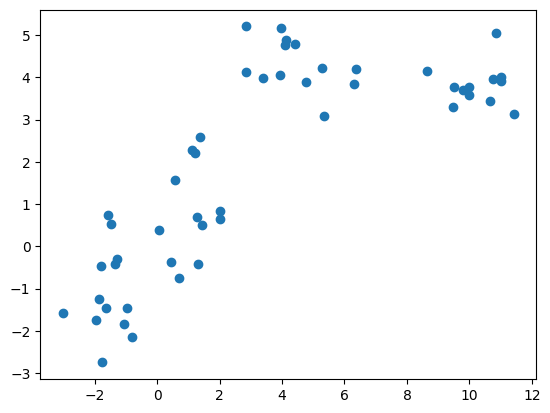

In [ ]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

<div style="text-align: justify"> Hasil diatas adalah representasi data dalam bentuk titik-titik yang tersebar pada posisi koordinat yang ditentukan oleh kolom pertama dan kedua dari setiap sampel. Setiap kelompok blob terbentuk dari titik-titik yang berdekatan, dan penentuan pusat kelompok blob melalui parameter 'centers' memengaruhi distribusi serta letak relatif titik-titik dalam plot. Dengan menggunakan parameter seperti jumlah sampel, standar deviasi cluster, dan pusat-pusat kelompok yang dapat disesuaikan, fungsi `make_blobs` memberikan fleksibilitas dalam menciptakan dataset sintetis untuk uji coba dan visualisasi algoritma clustering atau pembelajaran mesin. </div>


#### **c. Agglomerative Clustering**

Kelas Agglomerative Clustering akan membutuhkan dua masukan yaitu n_clusters dan linkage

###### **1. Single Linkage**

In [ ]:
# Inisialisasi objek AgglomerativeClustering
agglom_single = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom_single.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

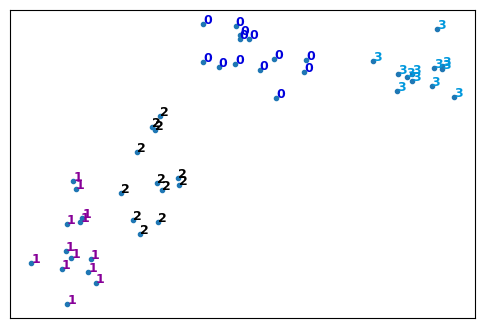

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  # Mengganti semua datapoint dengan nilai yang
  # merepresentasikan cluster dari datapoint tersebut
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    # Warna teks dipilih berdasarkan label cluster menggunakan palet warna 'nipy_spectral'.
    color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

<div style="text-align: justify"> Hasil diatas menunjukkan distribusi titik-titik setelah menjalankan proses Agglomerative Clustering pada data yang telah dibuat sebelumnya. Setiap titik diberi label cluster yang sesuai, dan warna titik mencerminkan label cluster tersebut. Terlihat bahwa titik-titik dengan label 1 dan 2 memiliki warna yang sama, menunjukkan bahwa mereka termasuk dalam cluster yang serupa. Sementara itu, dua buah titik dengan label 0 juga memiliki warna yang seragam, menandakan bahwa keduanya termasuk dalam cluster yang sama. Visualisasi ini memberikan gambaran intuitif tentang bagaimana algoritma Agglomerative Clustering telah mengelompokkan data ke dalam cluster-cluster yang memiliki karakteristik yang mirip. </div>


##### **2. Average Linkage**

In [ ]:
# Inisialisasi objek AgglomerativeClustering
agglom_avg = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

# Melatih model pengelompokan pada dataset
agglom_avg.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

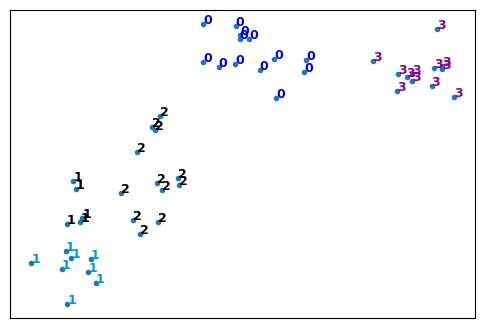

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  # Mengganti semua datapoint dengan nilai yang
  # merepresentasikan cluster dari datapoint tersebut
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    # Warna teks dipilih berdasarkan label cluster menggunakan palet warna 'nipy_spectral'.
    color=plt.cm.nipy_spectral(agglom_avg.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

Hasil diatas menunjukkan distribusi titik-titik setelah melalui proses Agglomerative Clustering. Setiap titik diberikan label cluster yang sesuai, dan warna titik mencerminkan label cluster tersebut, di mana titik-titik yang berdekatan termasuk dalam cluster yang sama. Meskipun terlihat bahwa data dengan label 1 dan 2 sudah memiliki warna yang berbeda, masih tampak beberapa titik data dengan label 2 yang memiliki warna yang sama dengan data berlabel 0. Hal ini dapat mengindikasikan adanya potensi ketidaksempurnaan atau tumpang tindih dalam proses clustering yang perlu diperhatikan lebih lanjut.

#### **d. Plotting Dendogram**
Plotting Dendogram akan digunakan untuk menentukan jarak antara titik ke titik lain dari sebuah dataset random (X1) yang sudah kita inisialisasi.

In [ ]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.09764163 0.78253301 ... 0.59128603 0.64924803 0.36209515]
 [0.09764163 0.         0.74840908 ... 0.57019061 0.6242739  0.45973164]
 [0.78253301 0.74840908 0.         ... 0.2071155  0.14611881 0.98920926]
 ...
 [0.59128603 0.57019061 0.2071155  ... 0.         0.06144484 0.78209375]
 [0.64924803 0.6242739  0.14611881 ... 0.06144484 0.         0.84324624]
 [0.36209515 0.45973164 0.98920926 ... 0.78209375 0.84324624 0.        ]]


<div style="text-align: justify"> Hasilnya adalah representasi jarak antara setiap pasang titik data dalam dataset X1. Ini memberikan gambaran tentang seberapa jauh atau dekat satu titik data dengan titik data lainnya dalam ruang fitur. Pada dasarnya, matriks jarak ini mencerminkan ukuran kedekatan relatif antara semua titik dalam dataset. Informasi ini sangat penting dalam konteks analisis data dan pembelajaran mesin, terutama saat menggunakan metode seperti clustering, di mana pemahaman tentang seberapa dekat atau seberapa jauh titik data satu sama lain dapat membantu dalam membentuk kelompok yang lebih signifikan. </div>


In [ ]:
# Menghitung Matriks Linkage dengan Metode "Single"
single = hierarchy.linkage(dist_matrix, 'single')

# Menghitung Matriks Linkage dengan Metode "Average"
average = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-12-b4c6374536ae>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-12-b4c6374536ae>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  average = hierarchy.linkage(dist_matrix, 'average')


Text(0.5, 1.0, 'Single Linkage')

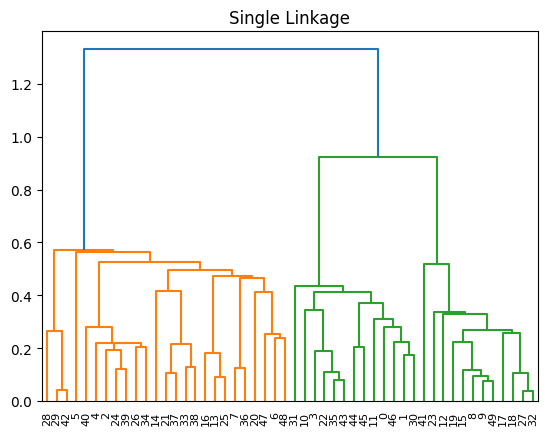

In [ ]:
# Single Linkage
dendro_single = hierarchy.dendrogram(single)
plt.title("Single Linkage")

<div style="text-align: justify"> Hasil penggabungan klaster menggunakan algoritma Agglomerative Clustering didasarkan pada jarak antara titik data. Titik data yang paling mirip digabungkan terlebih dahulu, sementara yang memiliki jarak terjauh, digabungkan terakhir. Secara keseluruhan, hasil clustering menunjukkan bahwa terdapat empat klaster utama dalam set data. Proses ini mengilustrasikan bagaimana algoritma Agglomerative Clustering secara bertahap menggabungkan titik data berdasarkan tingkat kemiripan mereka. </div>


Text(0.5, 1.0, 'Average Linkage')

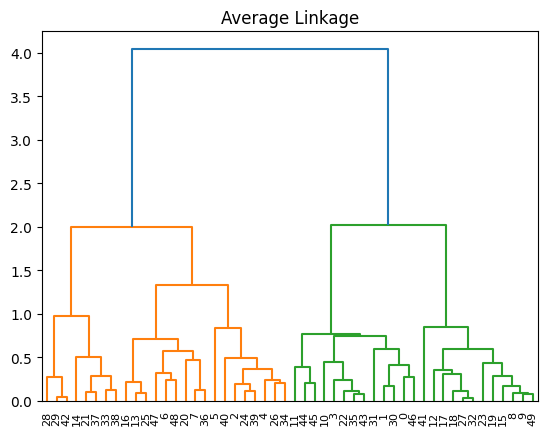

In [ ]:
# Average Linkage
dendro_average = hierarchy.dendrogram(average)
plt.title("Average Linkage")

<div style="text-align: justify"> Hasil penggabungan klaster menggunakan algoritma Agglomerative Clustering didasarkan pada jarak antara titik data. Titik data yang paling mirip digabungkan terlebih dahulu, sementara yang memiliki jarak terjauh, digabungkan terakhir. Secara keseluruhan, hasil clustering menunjukkan bahwa terdapat empat klaster utama dalam set data. Proses ini mengilustrasikan bagaimana algoritma Agglomerative Clustering secara bertahap menggabungkan titik data berdasarkan tingkat kemiripan mereka. </div>

#### **e. Perbedaan Single Linkage dengan Average Linkage**


<div style="text-align: justify"> Metode hierarchical clustering dapat dibedakan menjadi dua pendekatan yang umum digunakan: single linkage dan average linkage. Single linkage mengukur jarak antara dua klaster sebagai jarak terkecil antara anggota dari masing-masing klaster. Meskipun cepat dan efektif untuk data yang tidak berbentuk globular, metode ini rentan terhadap noise dan dapat menghasilkan klaster yang panjang serta berantai. Sebaliknya, average linkage menghitung jarak antara dua klaster sebagai rata-rata jarak antara semua pasangan anggota dari kedua klaster. Meskipun dapat bekerja baik pada data globular dan terpisah, average linkage dapat memberikan hasil yang bervariasi pada jenis data tertentu. Dalam contoh pengaplikasiannya pada data acak dengan empat klaster berpusat di titik-titik tertentu, dendrogram single linkage menunjukkan kecenderungan menggabungkan klaster yang berdekatan tanpa memperhatikan bentuk atau ukuran klaster, dapat mengakibatkan klaster yang tidak seimbang. Sebaliknya, dendrogram average linkage cenderung menghasilkan klaster yang lebih seimbang dan kompak dengan mempertimbangkan jarak rata-rata yang lebih kecil antara klaster yang akan digabungkan, mengatasi beberapa masalah yang mungkin muncul dalam pendekatan single linkage. </div>


### **2. Agglomerative Clustering Menggunakan Scipy dan Scikit-learn untuk Cars Clustering Dataset**

#### **a. Load Dataset Cars Clustering**

In [ ]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("/content/drive/MyDrive/Kuliah/cars_clus.csv")

In [ ]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

Kode diatas berfungsi untuk menampilkan dimensi data, dimana data diatas miliki 159 sampel data dan 16 fitur

In [ ]:
# Menampilkan 10 data teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


#### **b. Data Cleaning**
Melakukan data cleaning dengan membuang baris yang memiliki nilai null.

In [ ]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Ukuran pdf sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()

# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)

# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)

# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Ukuran pdf sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


<div style="text-align: justify"> Pada tahap analisis data, dilakukan cleaning dataset untuk memastikan kualitas dan integritas data yang digunakan. Dalam proses ini, dilakukan pemantauan ukuran dataset sebelum dan setelah proses pembersihan untuk memahami dampak dari langkah-langkah cleaning yang diimplementasikan. Selanjutnya, dilakukan transformasi data seperti pengubahan kolom-kolom tertentu menjadi tipe data numerik, menggantikan nilai non-numerik dengan NaN, menghapus baris yang mengandung nilai NaN, dan mengatur ulang indeks setelah penghapusan baris. Sebagai langkah pertama dalam pemahaman struktur dataset yang telah dibersihkan, ditampilkan 10 data teratas untuk memberikan wawasan awal terhadap konten yang telah diolah, sehingga mempermudah analisis dan eksplorasi data selanjutnya. </div>


#### **c. Feature Selection**


In [ ]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


<div style="text-align: justify"> Hasil diatas menampilkan baris data bersama dengan fitur-fitur yang telah terpilih dari dataset. Fitur kolom yang dipilih meliputi 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', dan 'mpg'. Dengan menampilkan subset tertentu dari fitur-fitur ini, kita dapat fokus pada variabel-variabel yang memiliki dampak signifikan pada analisis atau pemodelan yang sedang dilakukan, membuat proses interpretasi data lebih mudah dan fokus. </div>


#### **d. Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

<div style="text-align: right"> Menampilkan lima baris pertama dari dataset yang telah dinormalisasi, di mana nilai-nilai fitur dalam dataset tersebut telah diubah ke dalam rentang [0,1]. Proses normalisasi ini berguna untuk menyamakan skala antar-fitur, memungkinkan algoritma pembelajaran mesin bekerja lebih baik tanpa dipengaruhi oleh skala absolut dari masing-masing fitur. Dengan demikian, hasil output menunjukkan representasi data yang telah disesuaikan agar setiap nilai fitur memiliki pengaruh yang seimbang dalam analisis atau model yang akan diterapkan. </div>

#### **e. Agglomerative Clustering with Scipy**
Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk.

In [ ]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-21-9051c1b6cb8e>:12: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


##### **1. Single Linkage**

In [ ]:
# Single Linkage
cars_single = hierarchy.linkage(D, 'single')

<ipython-input-22-8f79a858983c>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cars_single = hierarchy.linkage(D, 'single')


In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")

# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3

# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(cars_single, max_d, criterion='distance')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

<div style="text-align: right"> Hasil dari code diatas adalah sebuah array yang berisi label kluster untuk setiap data dalam dataset, yang diperoleh melalui penerapan algoritma Agglomerative Clustering dengan metode single linkage. Dalam konteks ini, single linkage mengaitkan dua kluster berdasarkan jarak minimum antara anggota terdekat mereka. Batas jarak maksimum juga telah ditetapkan untuk menentukan kapan pembentukan kluster baru harus dihentikan. Proses ini memberikan insight tentang struktur kluster dalam dataset, di mana data yang saling mendekat dengan batas jarak tertentu akan dianggap sebagai anggota dari kluster yang sama. Analisis lebih lanjut terhadap hasil ini dapat membantu pemahaman terhadap pola-pola yang mungkin ada dalam data dan mendukung pengambilan keputusan terkait dengan kelompok data yang serupa. </div>

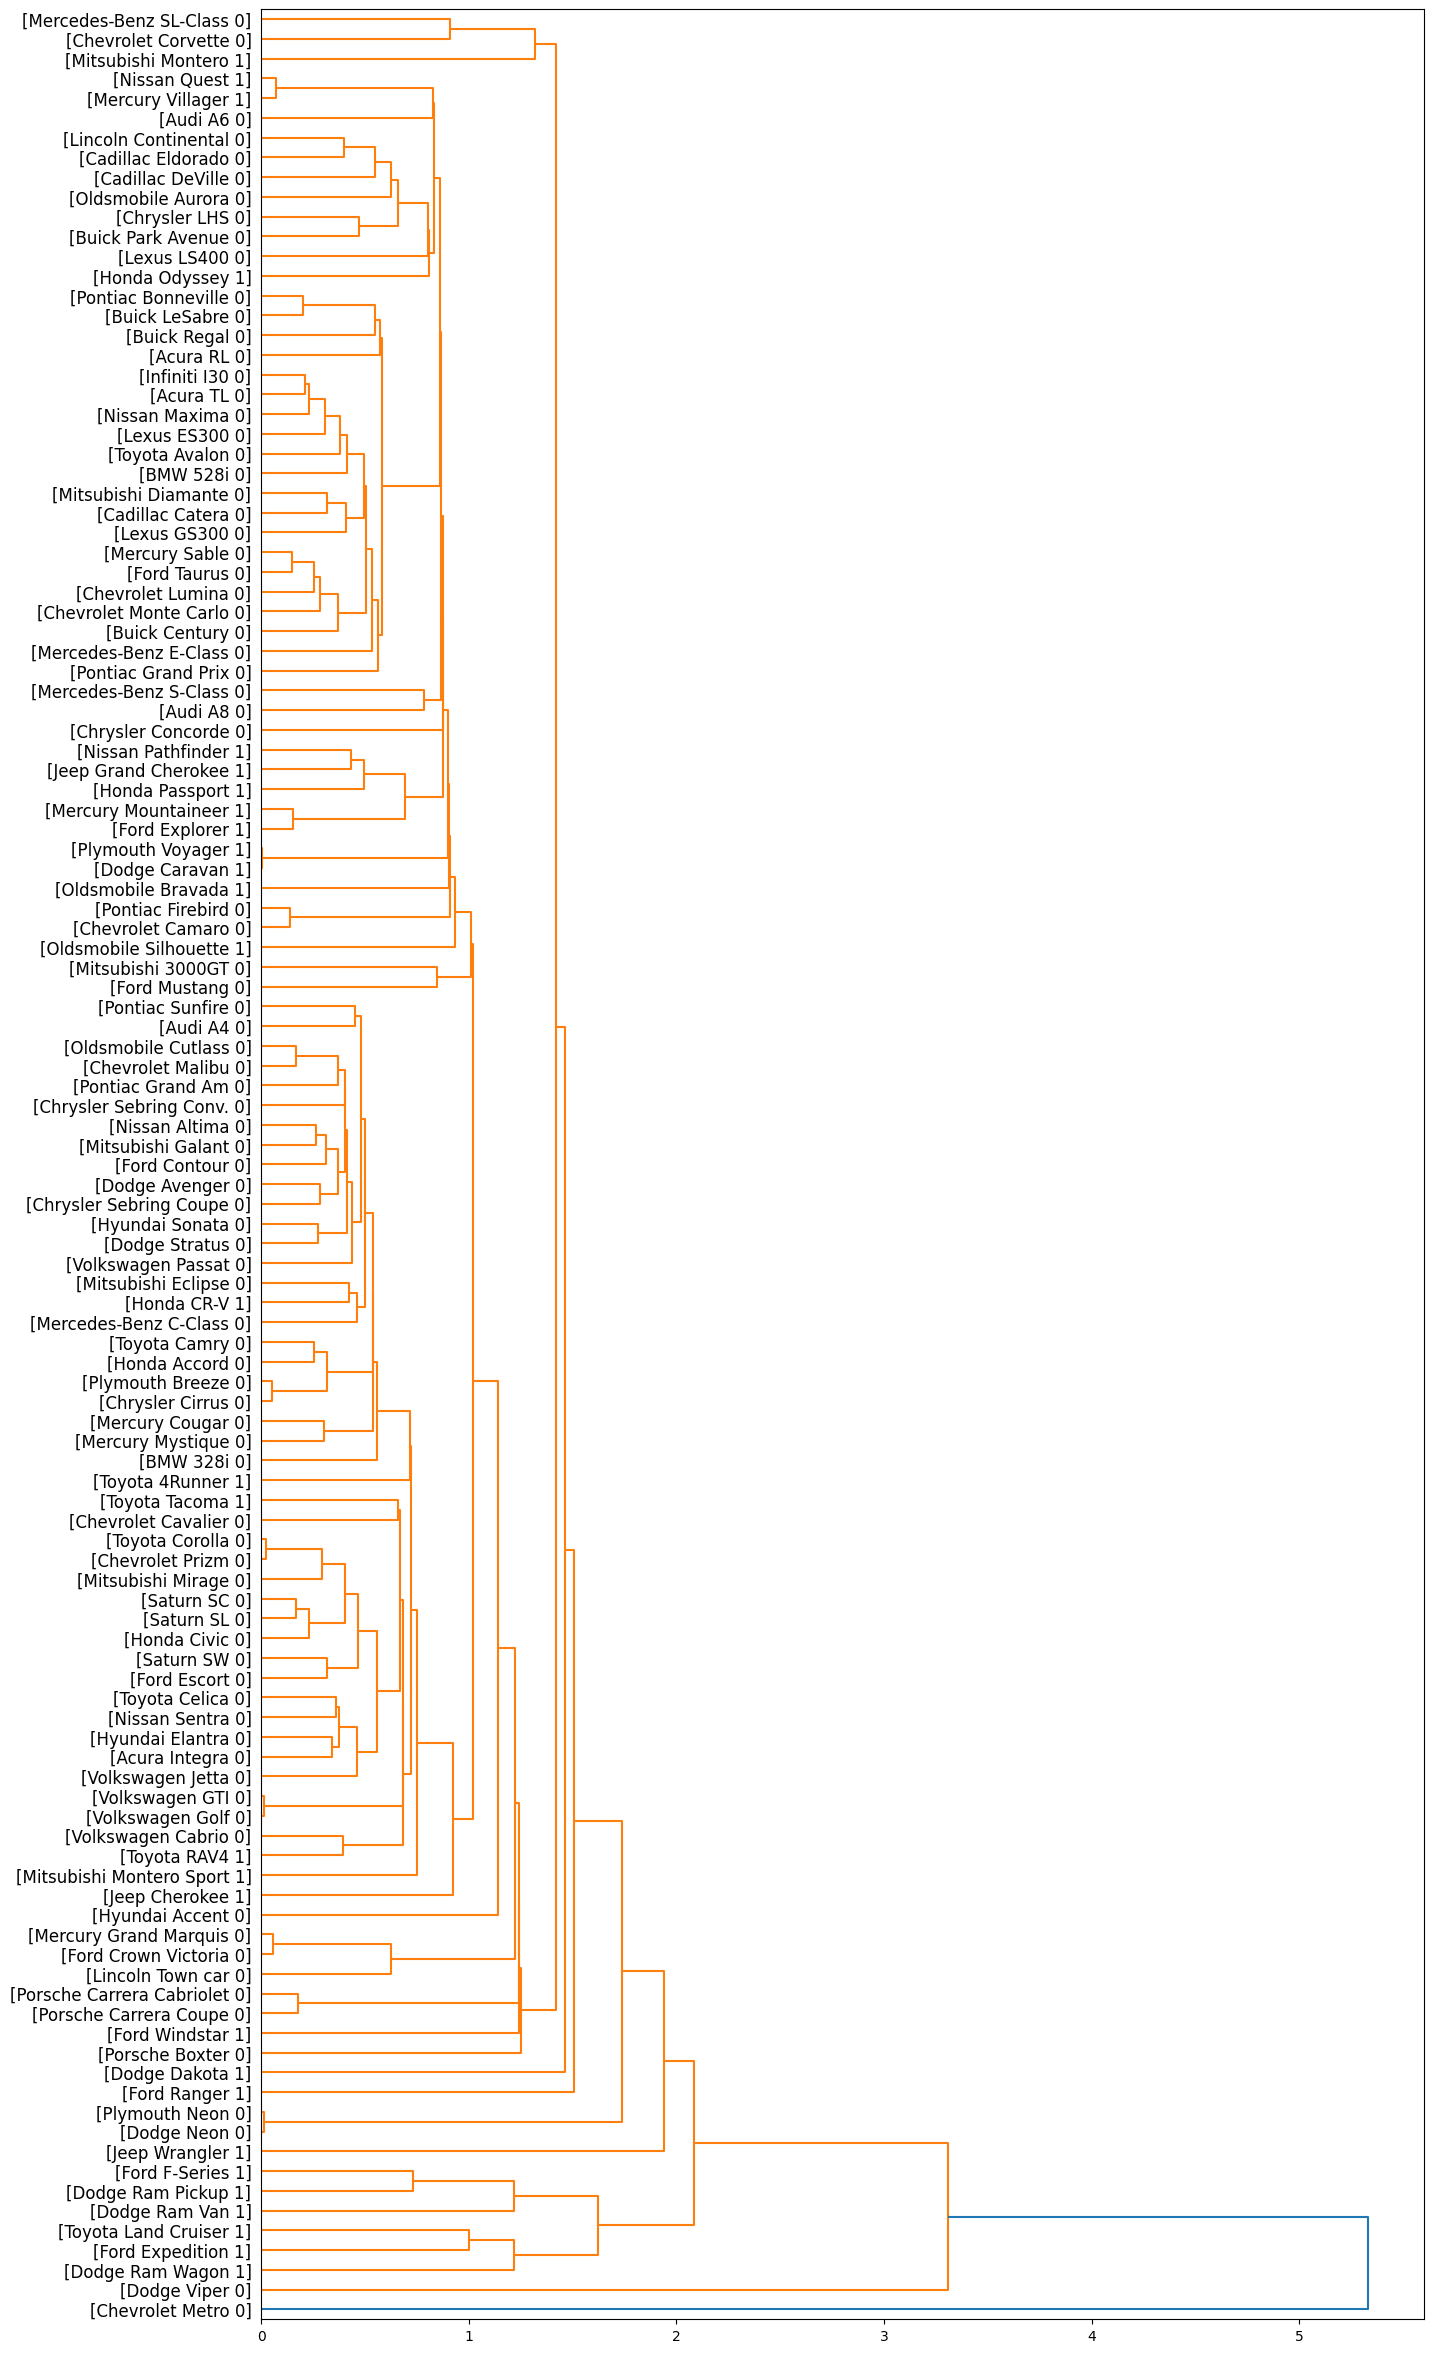

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(15,30))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro_cars_single = hierarchy.dendrogram(cars_single, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

<div style="text-align: right"> Proses agglomerative clustering menggabungkan mobil yang paling mirip terlebih dahulu, dan mobil yang paling berbeda akan digabungkan pada tahap terakhir. Hasilnya, terbentuklah beberapa klaster yang mencerminkan kesamaan karakteristik antara mobil-mobil tersebut. Misalnya, terdapat klaster yang mewakili tipe SUV, klaster untuk tipe sedan, dan klaster untuk tipe wagon. Dengan pendekatan ini, mobil-mobil yang memiliki kesamaan fitur atau atribut tertentu dikelompokkan bersama, mempermudah pemahaman tentang struktur dan pola yang ada dalam kumpulan data tersebut. </div>

##### **2. Average Linkage**

In [ ]:
# Average Linkage
cars_avg = hierarchy.linkage(D, 'average')

<ipython-input-25-56b5e0af2823>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cars_avg = hierarchy.linkage(D, 'average')


In [ ]:
# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")

# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(cars_avg, max_d, criterion='distance')
clusters

Average Linkage


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

<div style="text-align: right"> Hasil dari eksekusi algoritma Agglomerative Clustering pada dataset tersebut adalah sebuah array yang menyimpan label kluster untuk setiap data. Algoritma ini menggunakan metode average linkage, yang berarti penggabungan antara dua kluster diukur berdasarkan rata-rata jarak antara semua pasangan data dalam kedua kluster tersebut. Selain itu, hasil klustering juga dipengaruhi oleh batas jarak maksimum yang telah ditentukan, di mana kluster tidak akan digabungkan jika jarak antara dua kluster tersebut melebihi nilai batas tersebut. Sebagai contoh, pengaturan parameter pada algoritma tersebut dapat menciptakan kluster yang terbentuk secara optimal berdasarkan kriteria rata-rata jarak dan batas jarak maksimum yang telah diatur sebelumnya. </div>

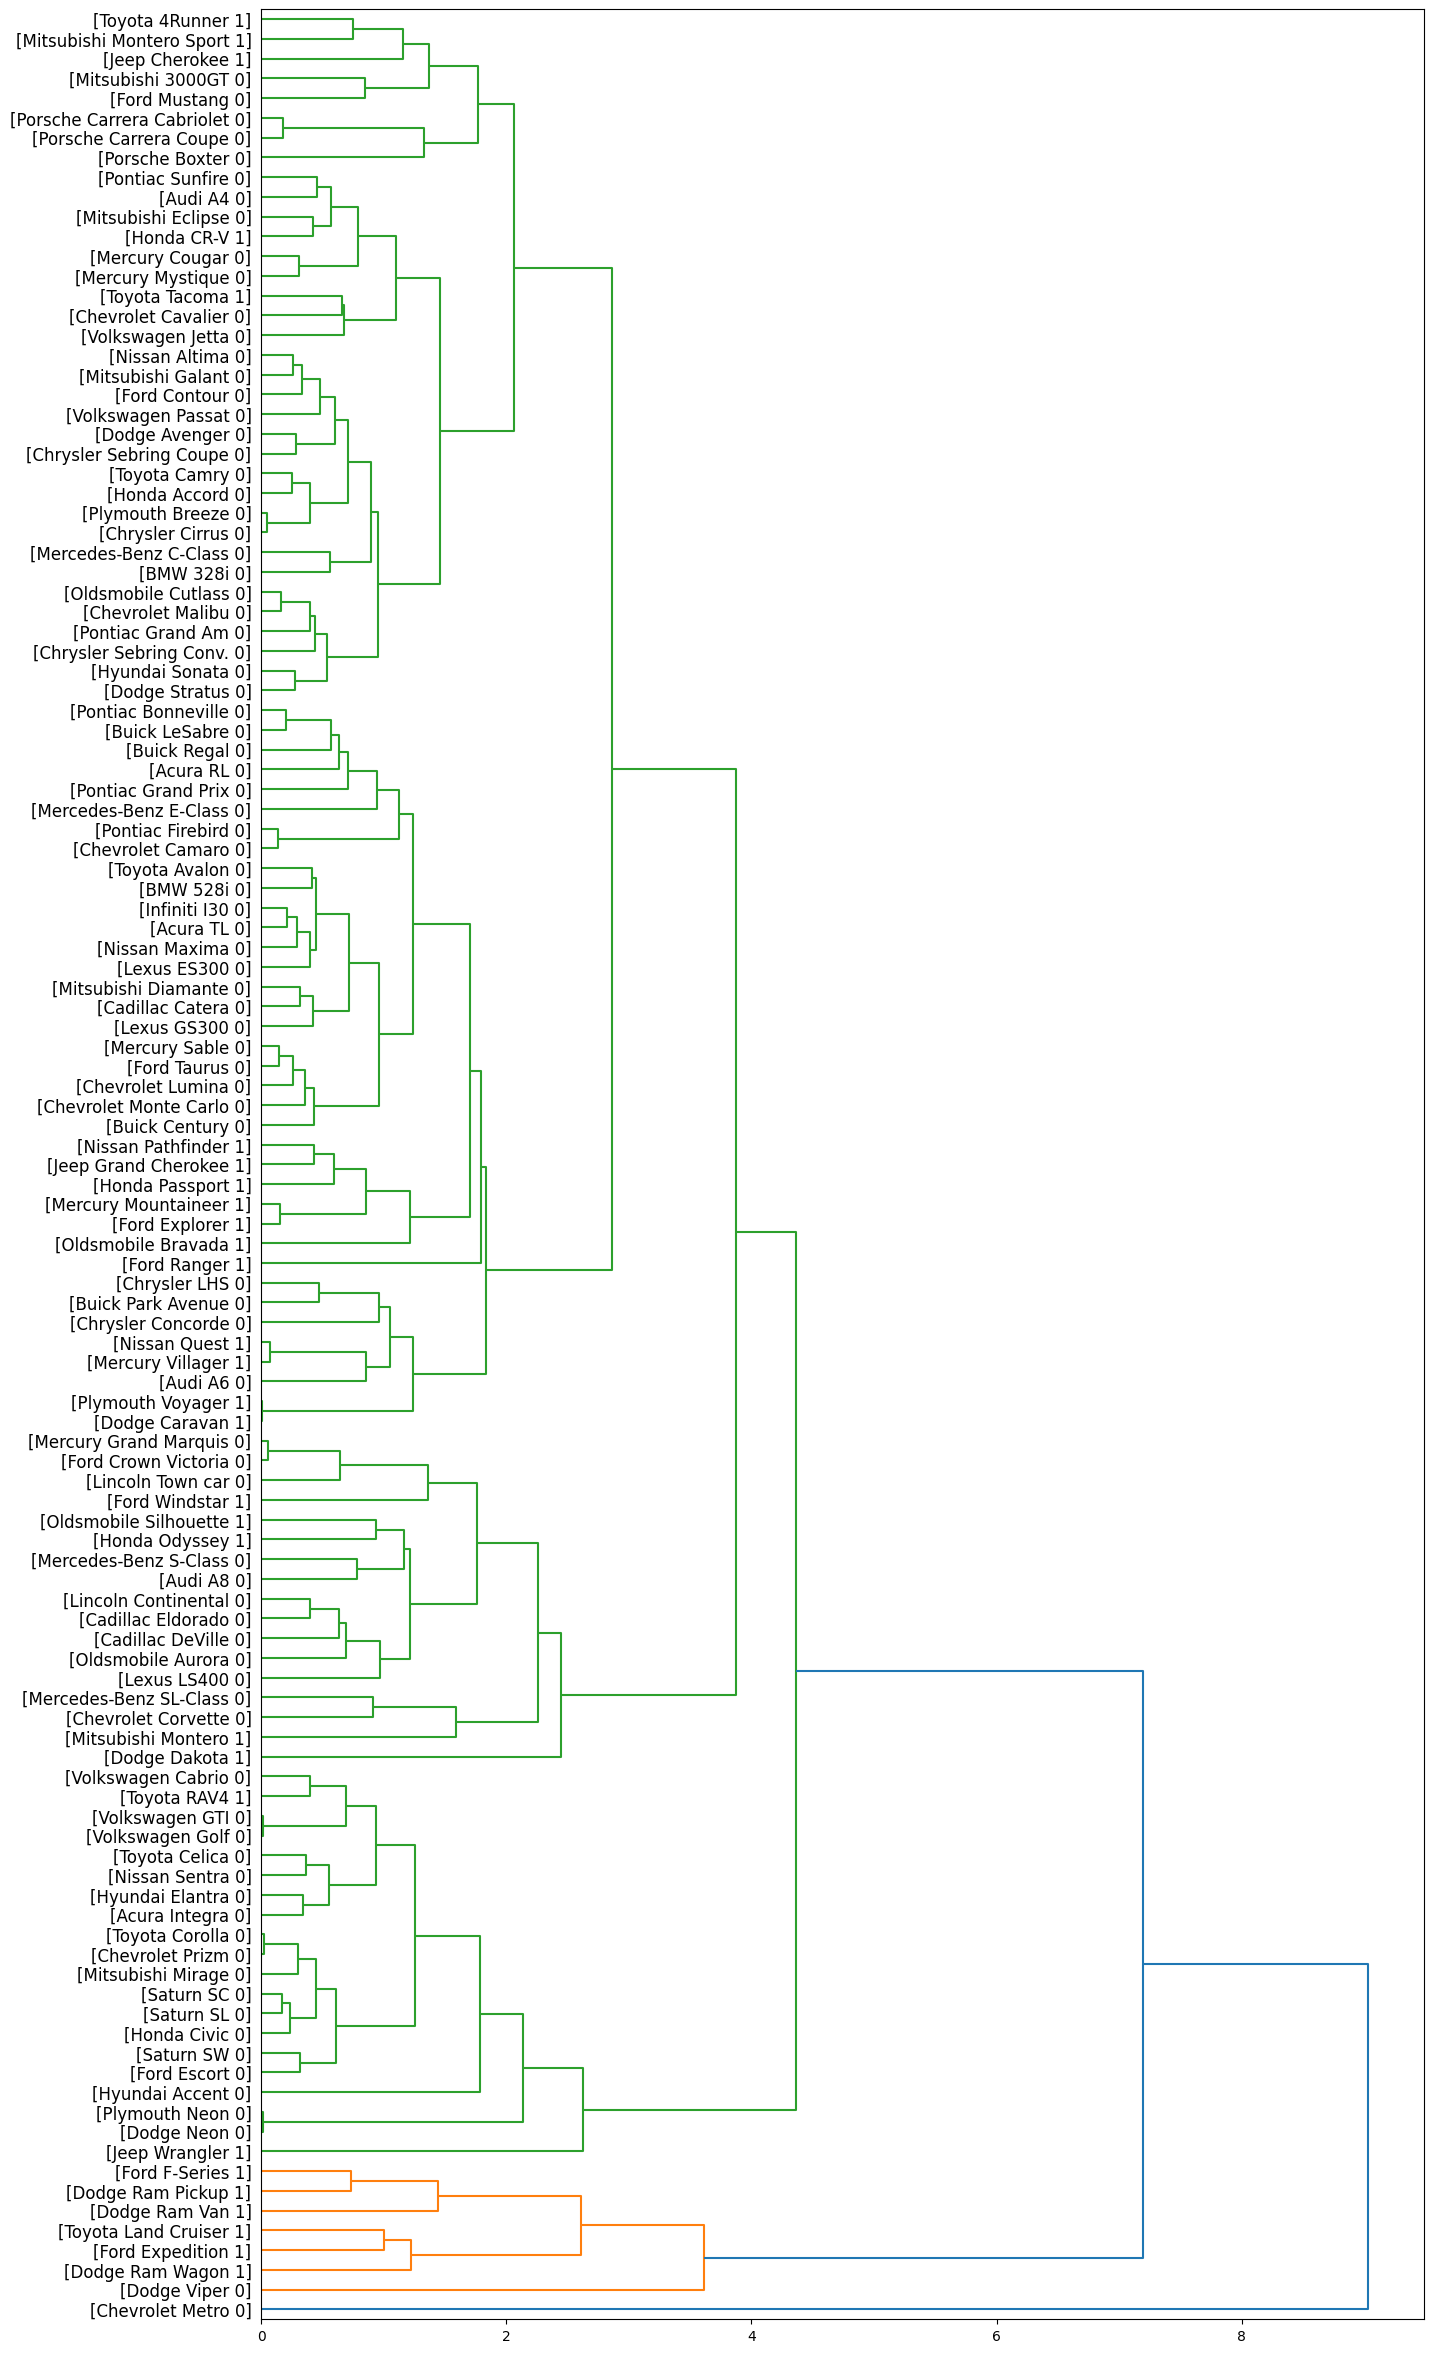

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(15,30))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro_cars_avg = hierarchy.dendrogram(cars_avg, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

<div style="text-align: justify"> Mobil-mobil dalam analisis klaster ini diurutkan berdasarkan tingkat kemiripan, di mana mobil yang memiliki kemiripan tinggi ditempatkan dalam klaster yang sama. Terdapat enam klaster hasil dari analisis, yakni klaster 1 hingga klaster 6. Klaster 1 mayoritas berisi mobil dengan tipe wagon, sementara klaster 2 didominasi oleh mobil tipe SUV. Klaster 3, sebaliknya, berisi mayoritas mobil dengan tipe sedan. Klaster 4 dan klaster 5 terdiri dari mobil-mobil dengan tipe kombinasi tertentu, menunjukkan tingkat kemiripan yang lebih rendah dibandingkan dengan klaster sebelumnya. Klaster 6 menjadi tuan rumah bagi satu mobil yang memiliki tipe yang unik dibandingkan dengan mobil-mobil lainnya. Proses pembentukan klaster ini memungkinkan pemahaman yang lebih baik mengenai kelompok-kelompok mobil berdasarkan kesamaan karakteristiknya. </div>

#### **f. Agglomerative Clustering with Scikit-Learn**
Library scikit-learn digunakan untuk  mengelompokkan dataset, Agglomerative Clustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up.
Berikut ini merupakan masukan untuk menampilkan matriks dari clustering yang akan dilakukan.

In [ ]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


<div style="text-align: right"> Hasil diatas menampilkan jarak antara setiap pasang poin dalam dataset, mencerminkan sejauh mana atau seberapa dekat satu poin dengan poin lainnya dalam ruang fitur. Ini memberikan gambaran tentang hubungan spasial antara titik-titik tersebut, memungkinkan untuk memahami seberapa besar perbedaan atau kesamaan antara nilai-nilai yang dimiliki oleh masing-masing poin. Jarak antara poin-poin tersebut memberikan informasi tentang struktur dan distribusi data, yang dapat digunakan untuk analisis dan pemahaman lebih lanjut terhadap pola atau tren yang mungkin ada dalam dataset tersebut. </div>

##### **1. Single Linkage**

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
cars2_single = AgglomerativeClustering(n_clusters = 6, linkage = 'single').fit(feature_mtx)

# Melakukan clustering
cars2_single.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

<div style="text-align: right"> hasil diatas menampilkan label klaster untuk setiap sampel dalam data. Hal ini berarti bahwa setiap data atau observasi dalam kumpulan data diberikan suatu label atau kategori klaster yang sesuai. Proses ini dapat dilakukan melalui penggunaan metode atau algoritma pengelompokan data, di mana setiap sampel diidentifikasi dan diberikan label yang mencerminkan kesamaan atau pola tertentu di antara mereka. Hasil ini dapat memberikan pemahaman yang lebih baik tentang struktur atau hubungan dalam data, memudahkan analisis, dan membantu dalam pengambilan keputusan berdasarkan informasi yang dihasilkan dari klasterisasi data. </div>

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
single_pdf = pdf.copy(deep=True)
# Menambahkan kolom baru ke DataFrame single_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (cars2_single), yang berisi label klaster untuk setiap sampel.
single_pdf['cluster_'] = cars2_single.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


<div style="text-align: right"> Menampilkan DataFrame baru yang merupakan salinan dari pdf dengan tambahan kolom cluster_ yang berisi label klaster hasil dari agglomerative clustering. </div>

In [ ]:
# Menghitung tipe di setiap cluster
single_pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

<div style="text-align: right"> Hasil analisis klaster menunjukkan distribusi mobil dalam enam klaster berbeda. Klaster 0 memiliki mayoritas mobil dengan Tipe 0.0, yaitu sebanyak 86 unit, sementara Tipe 1.0 memiliki 23 unit dalam klaster yang sama. Klaster 1 memiliki hanya 2 mobil dengan Tipe 1.0, sedangkan Klaster 2 memiliki 3 mobil dengan Tipe 1.0. Klaster 3 memiliki satu mobil dengan Tipe 0.0, sementara Klaster 4 dan Klaster 5 masing-masing hanya memiliki satu mobil dengan Tipe 1.0 dan Tipe 0.0. Hasil ini memberikan gambaran tentang sebaran mobil dalam setiap klaster dan tipe, dengan Klaster 0 menjadi yang paling dominan dengan jumlah mobil terbanyak. </div>

In [ ]:
# Karakteristik masing-masing cluster
agg_single_pdf = single_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_single_pdf

<ipython-input-32-a2ac83c3b0ba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_single_pdf = single_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

<div style="text-align: right"> Hasil tersebut mencerminkan karakteristik unik dari setiap klaster yang dihitung sebagai nilai rata-rata dari beberapa fitur yang dimiliki oleh mobil dalam setiap klaster. Sebagai contoh, untuk Klaster 0, terdapat satu tipe mobil, yaitu Tipe 0.0, yang memiliki rata-rata daya kuda sekitar 181.20, ukuran mesin rata-rata sekitar 2.90, efisiensi bahan bakar rata-rata sekitar 25.36 mpg, dan harga rata-rata sekitar 26.29. Penting untuk dicatat bahwa Tipe 1.0 tidak hadir dalam klaster ini. Informasi serupa diberikan untuk setiap klaster dan tipe mobil dalam bentuk nilai rata-rata untuk fitur-fitur yang relevan. </div>

###### **1) Scatter Plot**

<ipython-input-33-e7d0aed09df2>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

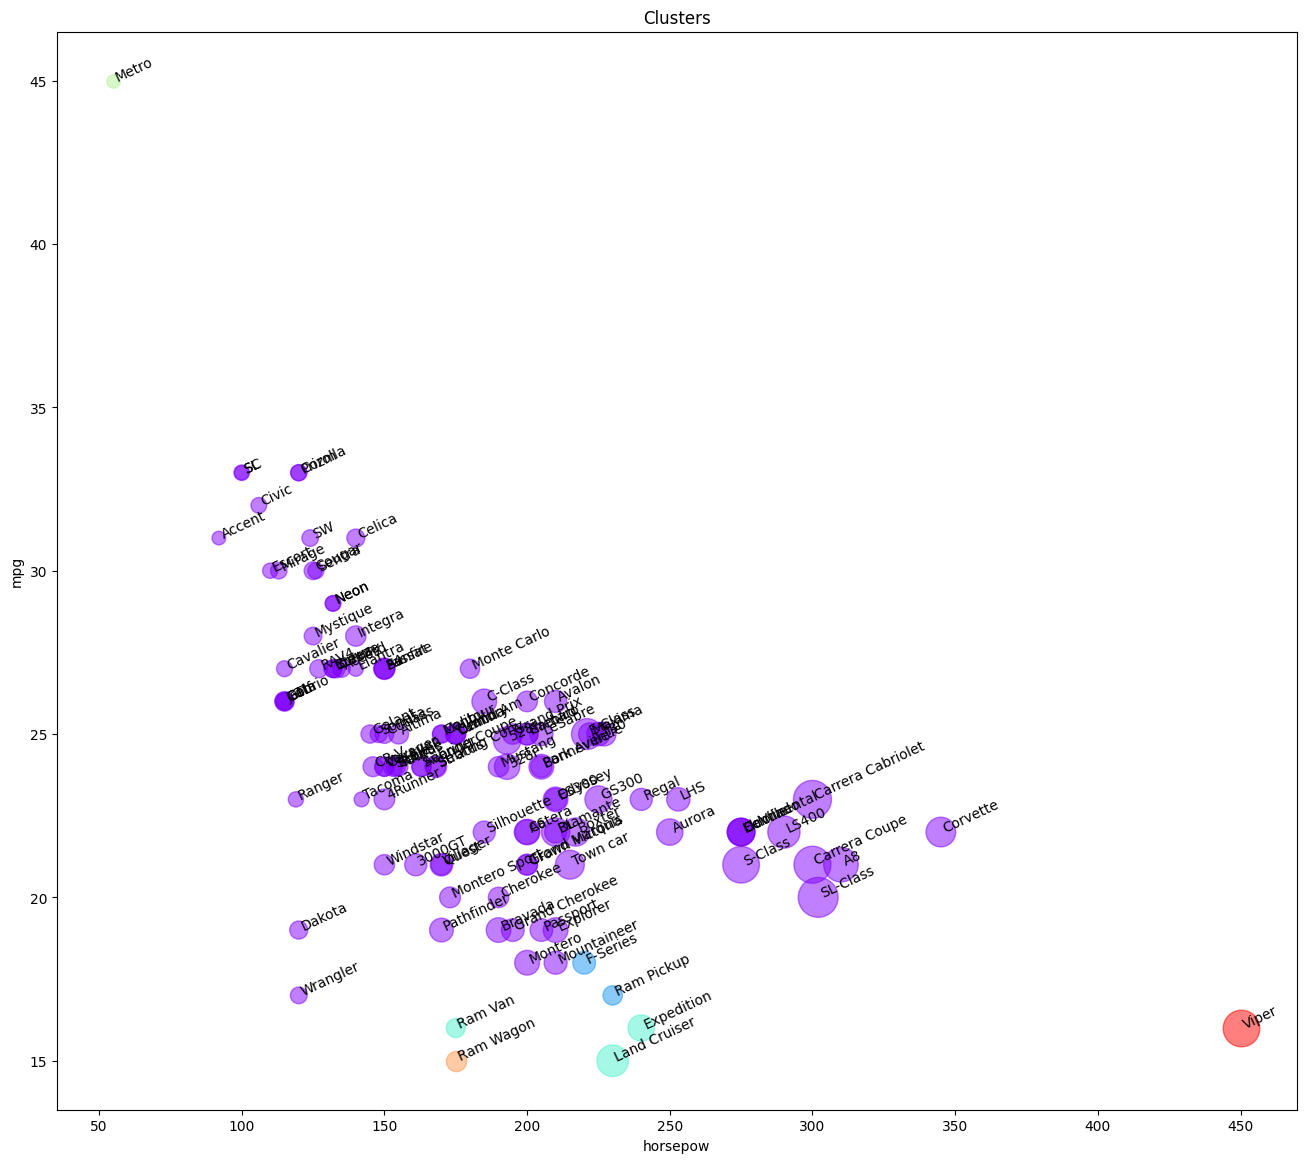

In [ ]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(cars2_single.labels_)+1
# Menghasilkan kumpulan warna dari spektrum pelangi dengan jumlah warna sebanyak klaster.
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
# Loop for untuk iterasi melalui setiap warna dan label klaster yang telah dihasilkan sebelumnya.
for color, label in zip(colors, cluster_labels):
  # Membuat subset dari DataFrame pdf yang hanya berisi data dari klaster dengan label yang sesuai.
  subset = pdf[single_pdf.cluster_ == label]
  # Loop melalui indeks subset
  for i in subset.index:
          # Menambahkan teks pada plot untuk menunjukkan model mobil di setiap titik data. Koordinatnya diambil dari horsepow dan mpg pada DataFrame subset.
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  # Menambahkan scatter plot untuk setiap klaster dengan menggunakan data dari subset. Ukuran titik (s) diatur berdasarkan nilai price, warna (c) diatur berdasarkan warna klaster yang sesuai, dan label diatur dengan menyertakan informasi klaster.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
# Menambahkan judul plot
plt.title('Clusters')
# Menambahkan label sumbu x
plt.xlabel('horsepow')
# Menambahkan label sumbu y
plt.ylabel('mpg')


Penjelasan hasil:
- Menampilkan titik-titik persebaran data beserta warna sesuai dengan clusternya.
- Terlihat bahwa sebagian besar data termasuk dalam cluster 0 yang ditunjukkan dengan warna ungu.

###### **2) Plotting Dendrogram**

<ipython-input-34-9511408e0ac8>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

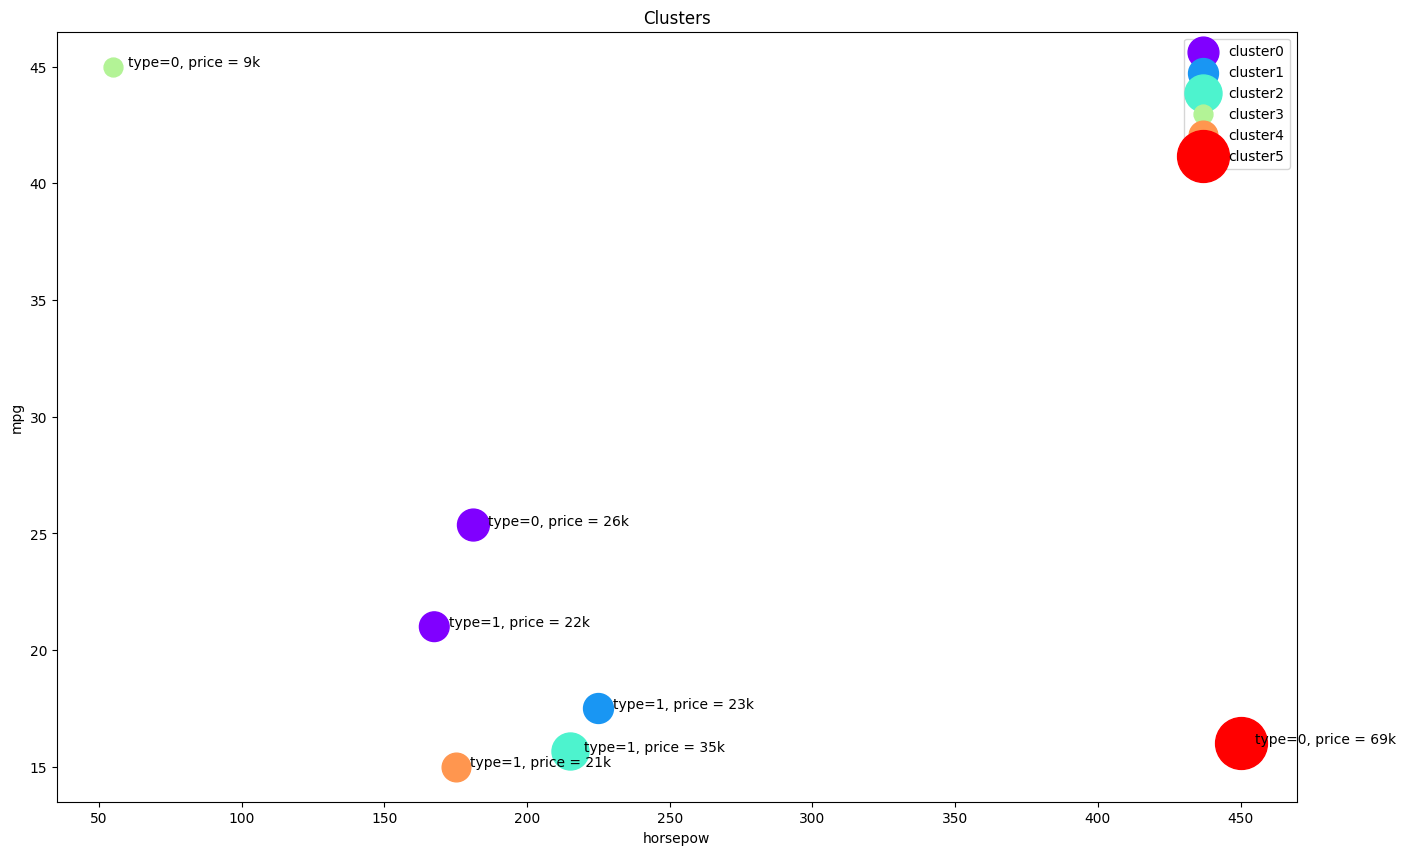

In [ ]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
# Loop yang akan beriterasi melalui setiap warna dan label klaster. Warna dan label ini digunakan untuk membedakan dan memberi label setiap klaster.
for color, label in zip(colors, cluster_labels):
  # Membuat subset dari agg_avg_pdf untuk klaster tertentu. Ini membantu dalam visualisasi klaster yang berbeda di plot.
  subset = agg_single_pdf.loc[(label,),]
  # Loop nested yang akan beriterasi melalui indeks subset, yang sesuai dengan tipe dalam klaster tertentu.
  for i in subset.index:
    # Menambahkan teks pada plot, menunjukkan tipe, dan harga untuk setiap titik dalam klaster. Koordinat teks diatur berdasarkan horsepow dan mpg dari setiap titik.
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  # Membuat plot sebar untuk setiap klaster dengan menggunakan horsepow sebagai sumbu x, mpg sebagai sumbu y, dan harga sebagai ukuran titik. Warna dan label klaster diberikan sesuai dengan iterasi loop.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
# Menambahkan judul ke plot.
plt.title('Clusters')
# Menambahkan label sumbu x dan y ke plot.
plt.xlabel('horsepow')
plt.ylabel('mpg')

Penjelasan hasil:
- Visualisasi setiap klaster dimana setiap titik diberi warna berdasarkan keanggotaan klaster dan keterangan tipe dan harganya. Tipe berbeda dalam klaster yang sama ditunjukkan dengan warna yang sama. Hasil ini diambil dari karakteristik masing-masing klaster yang disimpan dari variable agg_single_pdf.

##### **2. Average Linkage**

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
cars2_avg = AgglomerativeClustering(n_clusters = 6, linkage = 'average').fit(feature_mtx)

# Melakukan clustering
cars2_avg.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

<div style="text-align: right"> Menampilkan jarak antara setiap pasang poin dalam dataset dan mencerminkan seberapa jauh atau seberapa dekat satu poin dengan poin lainnya dalam ruang fitur. </div>

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
avg_pdf = pdf.copy(deep=True)
# Menambahkan kolom baru ke DataFrame avg_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (cars2_avg), yang berisi label klaster untuk setiap sampel.
avg_pdf['cluster_'] = cars2_avg.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


<div style="text-align: right"> Menampilkan DataFrame baru yang merupakan salinan dari pdf dengan tambahan kolom cluster_ yang berisi label klaster hasil dari agglomerative clustering. </div>

In [ ]:
# Menghitung tipe di setiap cluster
avg_pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

<div style="text-align: right"> Hasil analisis klaster menunjukkan bahwa terdapat enam klaster yang dapat diidentifikasi berdasarkan tipe mobil. Klaster 0 memiliki 47 mobil dengan tipe 0.0 dan 7 mobil dengan tipe 1.0. Klaster 1 terdiri dari 3 mobil dengan tipe 0.0, sementara Klaster 2 memiliki 4 mobil dengan tipe 1.0. Klaster 3 hanya memiliki 1 mobil dengan tipe 0.0. Klaster 4 menunjukkan distribusi yang lebih seimbang, dengan 37 mobil tipe 0.0 dan 16 mobil tipe 1.0. Klaster 5, pada gilirannya, memiliki 2 mobil dengan tipe 1.0. Analisis ini memberikan wawasan tentang pola klaster dan distribusi tipe mobil dalam dataset, membantu pemahaman tentang karakteristik kelompok mobil yang serupa. </div>

In [ ]:
# Karakteristik masing-masing cluster
agg_avg_pdf = avg_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_avg_pdf

<ipython-input-38-3c4a11d7384c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_avg_pdf = avg_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

<div style="text-align: right"> Hasil diatas mencerminkan karakteristik unik dari setiap klaster, yang diukur sebagai nilai rata-rata dari berbagai fitur mobil yang termasuk dalam klaster tersebut. Sebagai ilustrasi, dalam Klaster 0, terdapat beberapa tipe mobil dengan ciri khas sebagai berikut: Horsepower memiliki rata-rata sekitar 46.53, ukuran mesin (engine_s) rata-rata sekitar 2.25, efisiensi bahan bakar (mpg) mencapai rata-rata sekitar 27.02, dan harga mobil (price) memiliki nilai rata-rata sekitar 20.31. Demikianlah untuk setiap fitur dalam klaster tersebut, menciptakan gambaran holistik terhadap profil mobil di masing-masing klaster. </div>

###### **1) Scatter Plot**

<ipython-input-39-8cce448dbbbd>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

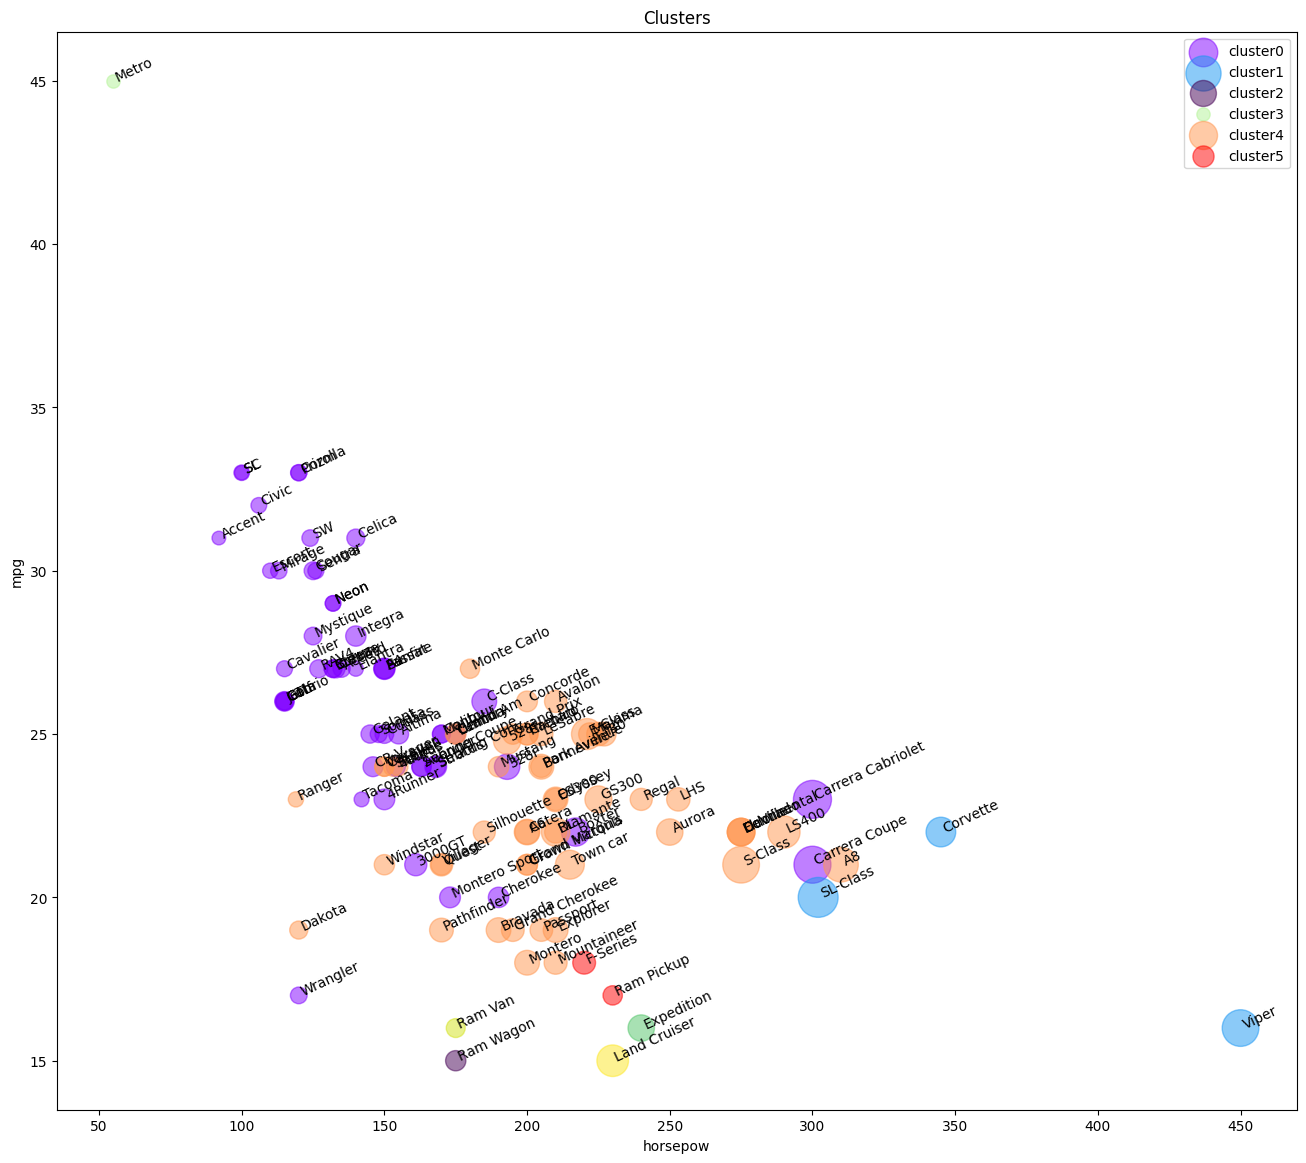

In [ ]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(cars2_avg.labels_)+1
# Menghasilkan kumpulan warna dari spektrum pelangi dengan jumlah warna sebanyak klaster.
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[avg_pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

<div style="text-align: right"> Hasil tampilan menunjukkan distribusi data dalam bentuk titik-titik yang diwarnai sesuai dengan kluster masing-masing. Dapat diamati bahwa mayoritas data tergolong dalam kluster 0 yang ditandai dengan warna ungu, serta kluster 4 yang ditunjukkan dengan warna oranye. </div>

###### **2) Plotting Dendrogram**

<ipython-input-40-b608330d92e5>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

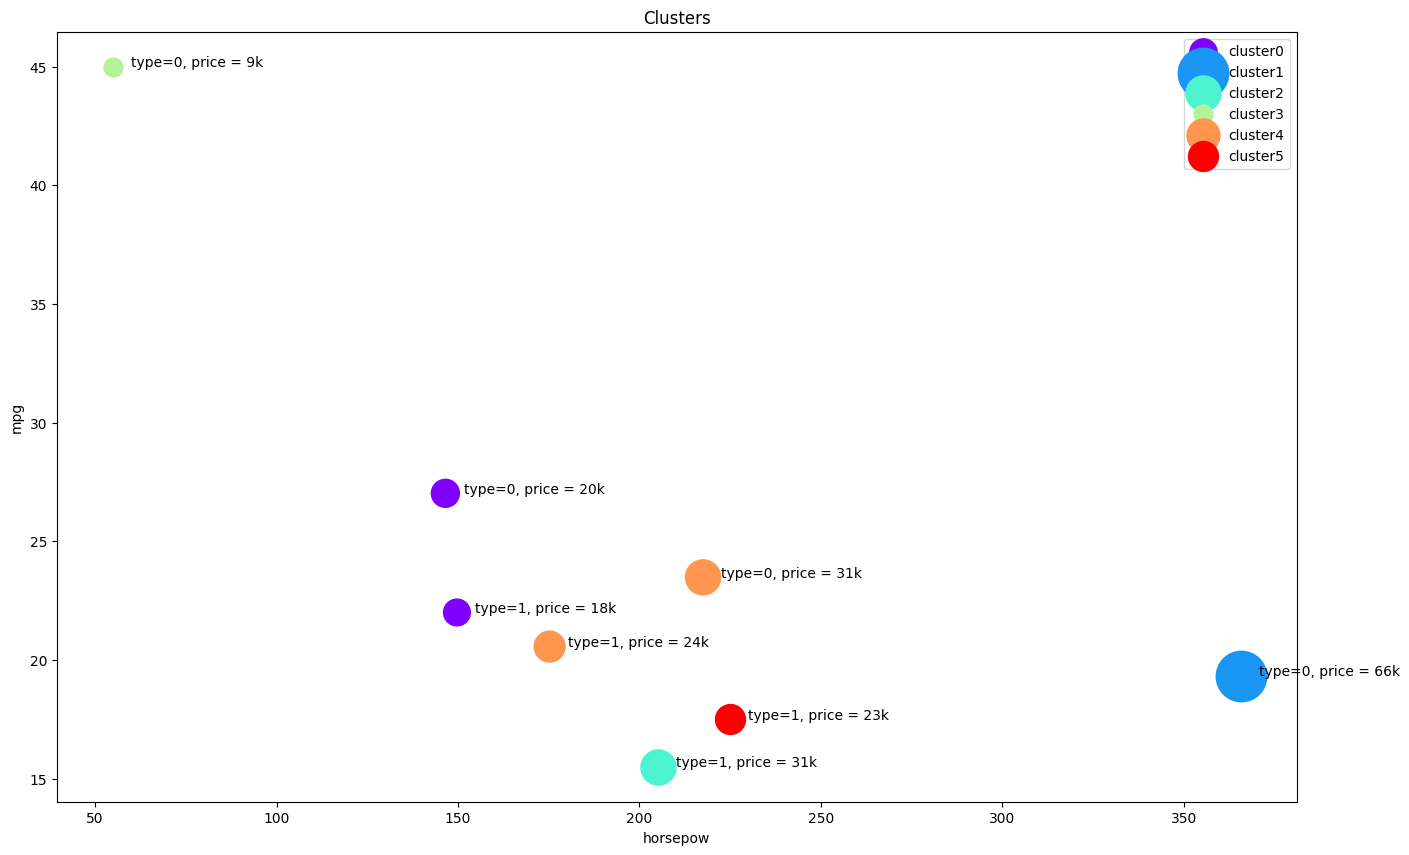

In [ ]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_avg_pdf.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

<div style="text-align: right"> Hasil visualisasi  diatas menunjukkan klaster-klasternya dengan setiap titik yang diwarnai sesuai dengan klaster tempatnya berada, dan informasi tambahan mengenai tipe dan harga setiap titik. Warna yang sama digunakan untuk menandakan tipe yang berbeda namun berada dalam klaster yang sama. Data ini berasal dari karakteristik masing-masing klaster yang telah disimpan dalam variabel agg_avg_pdf. </div>

#### **g. Perbedaan Agglomerative clustering Single Linkage dan Average linkage menggunakan Scipy dan Scikit-learn**

<div style="text-align: justify"> Agglomerative clustering merupakan metode hierarkis yang menggabungkan objek dengan kemiripan tertinggi secara bertahap, berdasarkan jarak antara mereka. Proses ini memanfaatkan matriks jarak antar objek dan kriteria linkage untuk menentukan jarak antar klaster. Single Linkage, salah satu kriteria linkage, menghitung jarak antara dua klaster sebagai jarak terkecil antara anggota keduanya. Meskipun cepat dan cocok untuk data non-globular, metode ini rentan terhadap noise dan dapat menghasilkan klaster yang panjang. Di sisi lain, Average Linkage menghitung jarak antara dua klaster sebagai rata-rata jarak antara semua pasangan anggota. Meskipun efektif untuk data globular dan terpisah, metode ini menghasilkan hasil yang bervariasi pada situasi lain. Scipy dan Scikit-learn, dua modul Python, menyediakan alat untuk menerapkan Agglomerative clustering dengan berbagai kriteria linkage. Scipy memberikan fungsi `linkage` dan `dendrogram` untuk menghitung matriks linkage dan membuat dendrogram, sementara Scikit-learn menyediakan kelas `AgglomerativeClustering` untuk menghitung label klaster dan fitur-fitur aglomerasi. </div>


### **3. Agglomerative Clustering Menggunakan Scipy dan Scikit_learn untuk Iris Dataset**

##### **a. Import Iris Dataset**

In [ ]:
# Import dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()

#### **b. Convert Dataset**

In [ ]:
# Convert Dataset
pdf_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
pdf_iris['target'] = iris.target
pdf_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<div style="text-align: right"> Menampilkan lima baris pertama dari DataFrame pdf_iris beserta fitur-fiturnya dan kolom baru bernama target yang telah ditambahkan yang berisi label kelas. </div>

#### **c. Normalize Dataset**

In [ ]:
# Normalize the dataset
# i berisikan nilai dari pdf_iris yang nantinya akan digunakan untuk normalisasi
i = pdf_iris.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(i)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

<div style="text-align: right"> Menunjukkan lima baris pertama dari dataset yang telah dinormalisasi dimana nilai fitur-fitur dalam dataset tersebut berada dalam rentang [0,1]. </div>

#### **d. Agglomerative Clustering with Scipy**

In [ ]:
# Clustering with Scipy
# Mengimpor modul untuk keperluan ilmiah dan analisis data
import scipy
# Mengimpor modul untuk fungsi-fungsi pemrograman grafis
import pylab
# Mengimpor modul untuk analisis clustering hirarkis
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    # Menggunakan fungsi scipy.spatial.distance.euclidean untuk menghitung jarak Euclidean antara dua data dan disimpan dalam matriks jarak D
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])


# Single Linkage
iris_single = hierarchy.linkage(D, 'single')

# Average Linkage
iris_avg = hierarchy.linkage(D, 'average')

# Average Linkage
iris_complete = hierarchy.linkage(D, 'complete')

<ipython-input-44-ea4800c02fac>:12: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])
<ipython-input-44-ea4800c02fac>:22: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_single = hierarchy.linkage(D, 'single')
<ipython-input-44-ea4800c02fac>:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_avg = hierarchy.linkage(D, 'average')
<ipython-input-44-ea4800c02fac>:28: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_complete = hierarchy.linkage(D, 'complete')


##### **1. Plotting Dendrogram**

###### **a). Single Linkage**

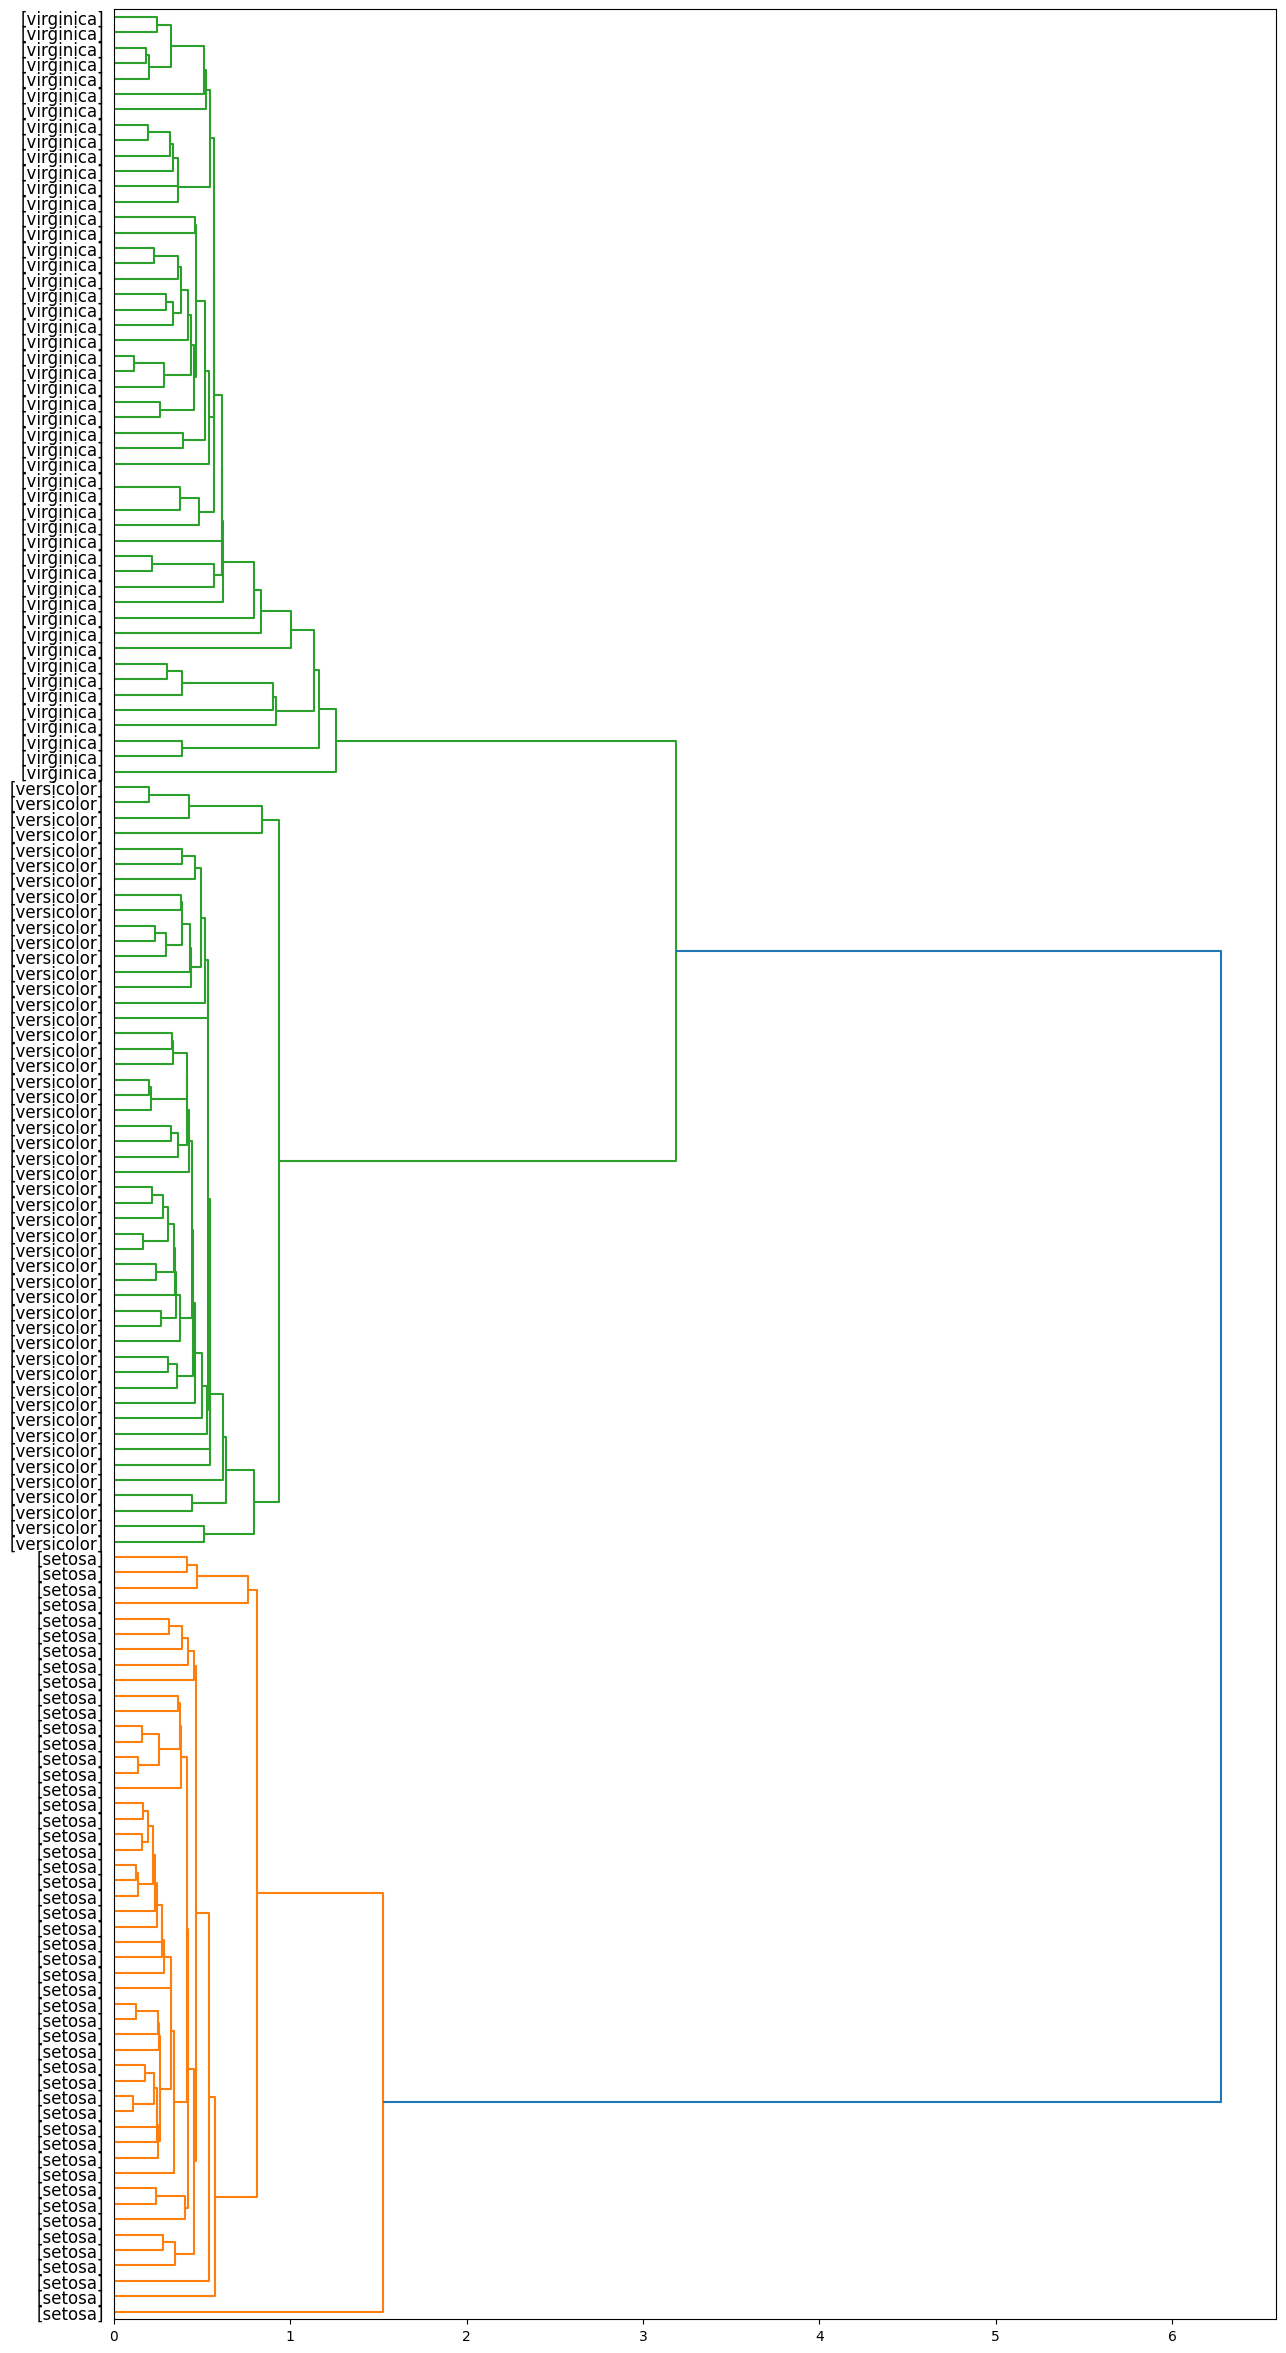

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(15,30))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf_iris['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(iris_single, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

<div style="text-align: right"> Metode ini mengaitkan dua klaster dengan mempertimbangkan jarak terkecil antara dua objek dari klaster yang berbeda. Dendrogram hasil menunjukkan kecenderungan metode ini untuk membentuk klaster yang memiliki panjang dan distribusi yang tidak seimbang. Formasi klaster juga tidak selalu mencerminkan label kelas yang sesungguhnya. Sebagai contoh, terdapat pembagian objek berlabel setosa ke dalam dua klaster terpisah, sementara objek dengan label versicolor dan virginica justru tergabung dalam satu klaster yang sama. </div>

###### **b). Average Linkage**

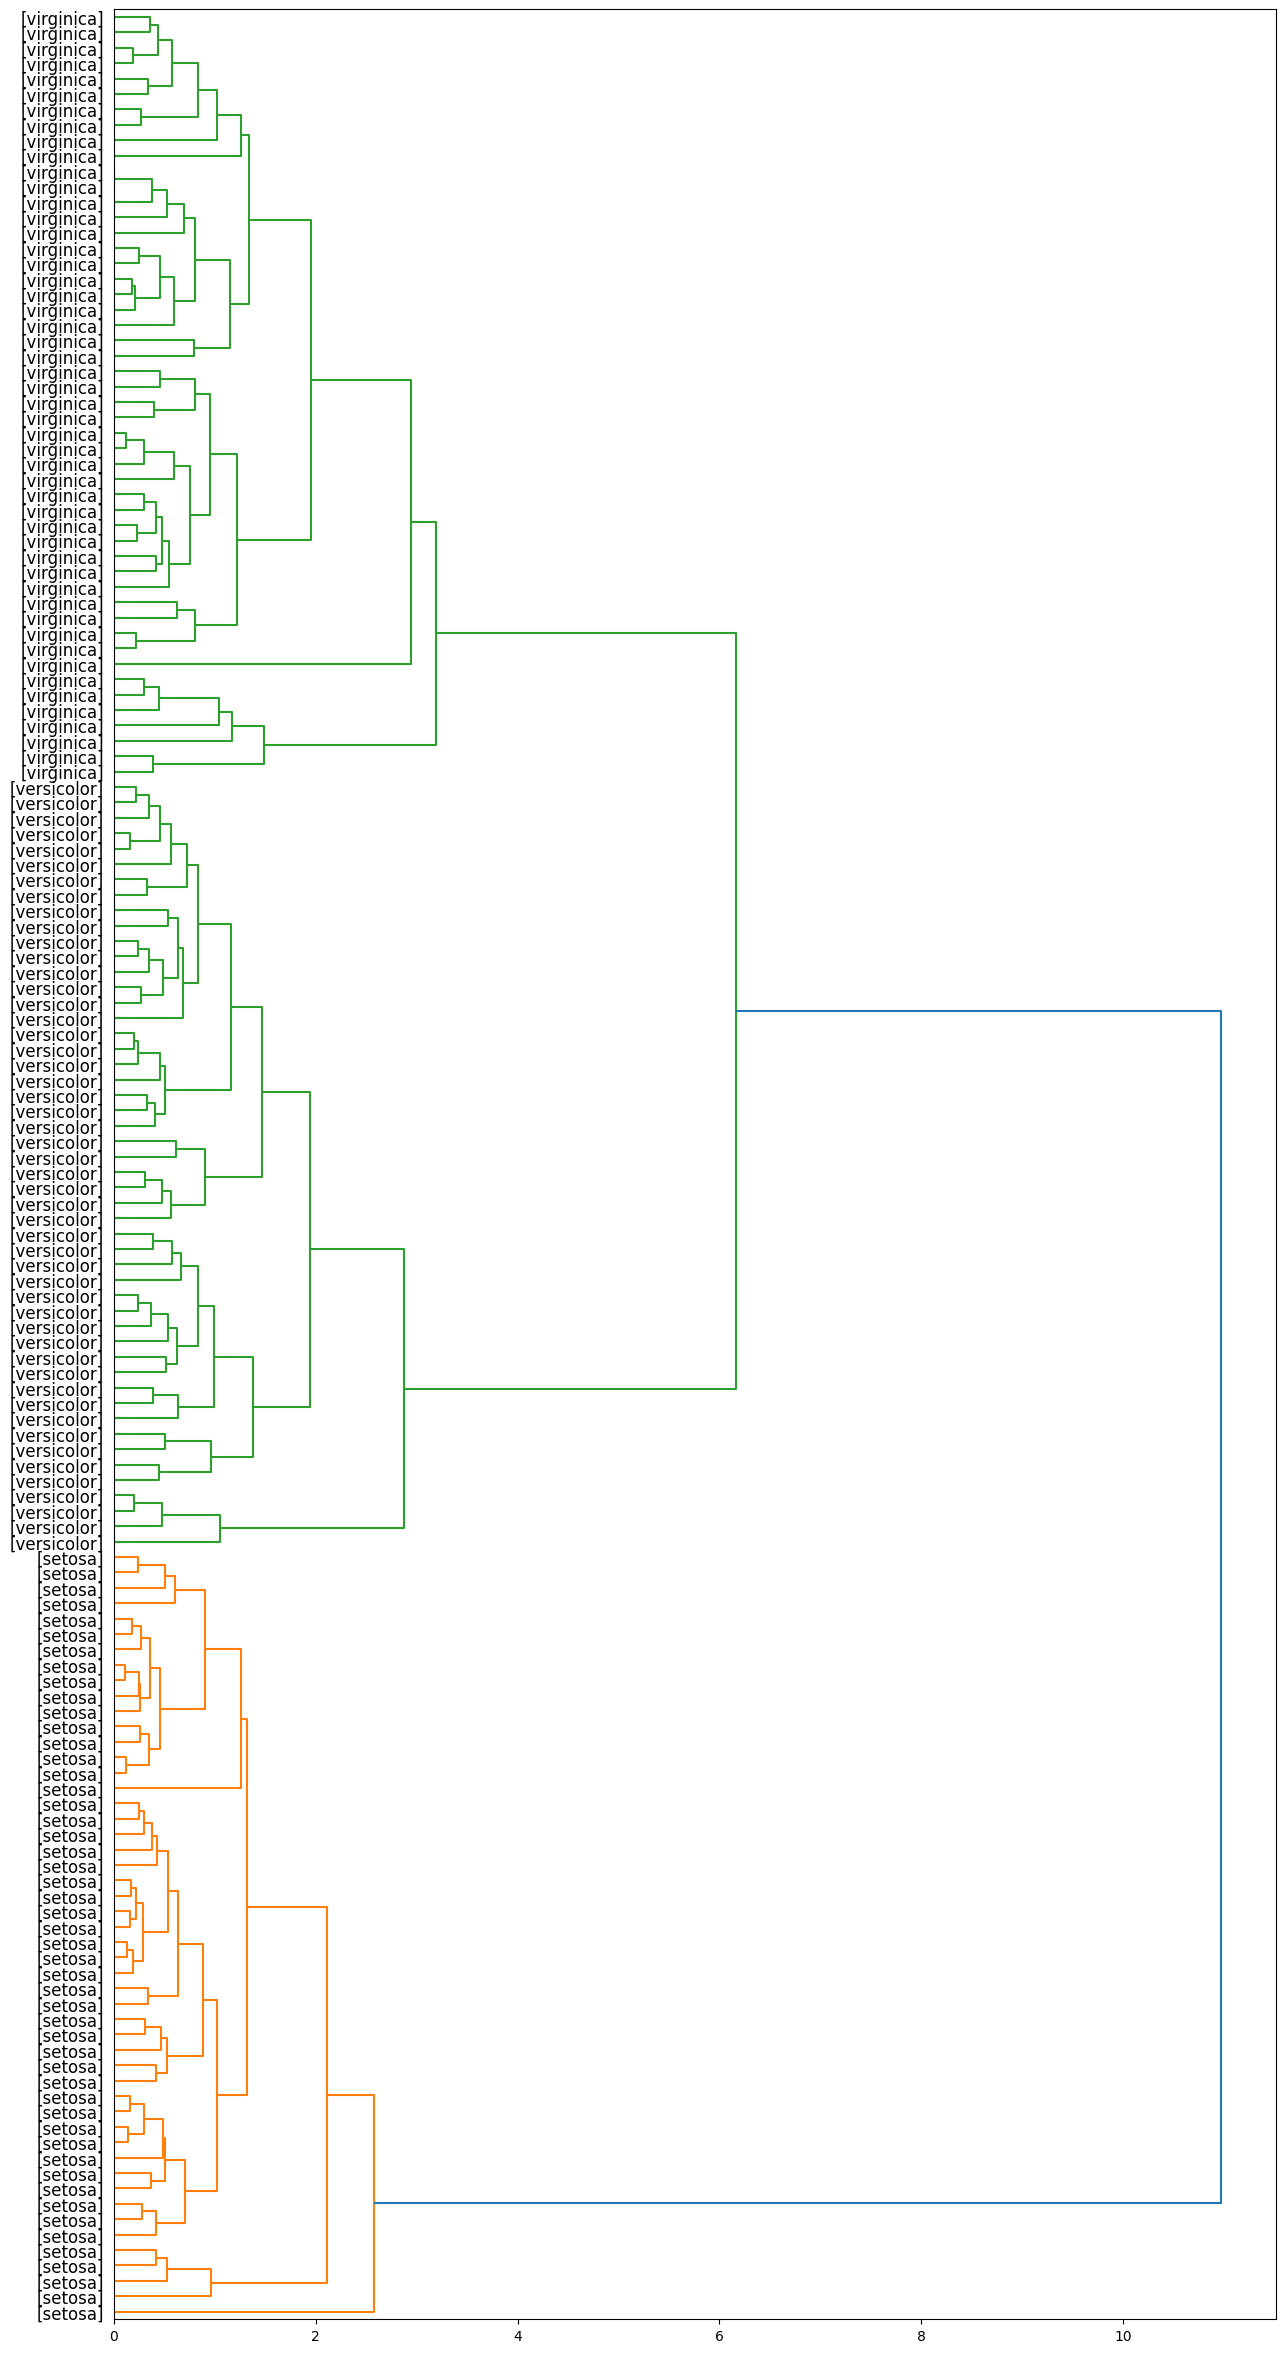

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(15,30))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf_iris['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(iris_avg, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

<div style="text-align: right"> Metode ini menggabungkan dua klaster dengan mempertimbangkan rata-rata jarak antara semua objek dari klaster yang berbeda. Dendrogram hasil menunjukkan bahwa pendekatan ini menghasilkan klaster yang seimbang dan sesuai dengan label kelas sebenarnya. Klaster yang terbentuk mencerminkan tiga label kelas yang ada, yaitu setosa, versicolor, dan virginica. Meskipun demikian, masih terdapat beberapa kesalahan pengelompokan, seperti objek dengan label kelas versicolor yang tergabung dalam klaster virginica, atau sebaliknya. </div>

###### **c). Complete Linkage**

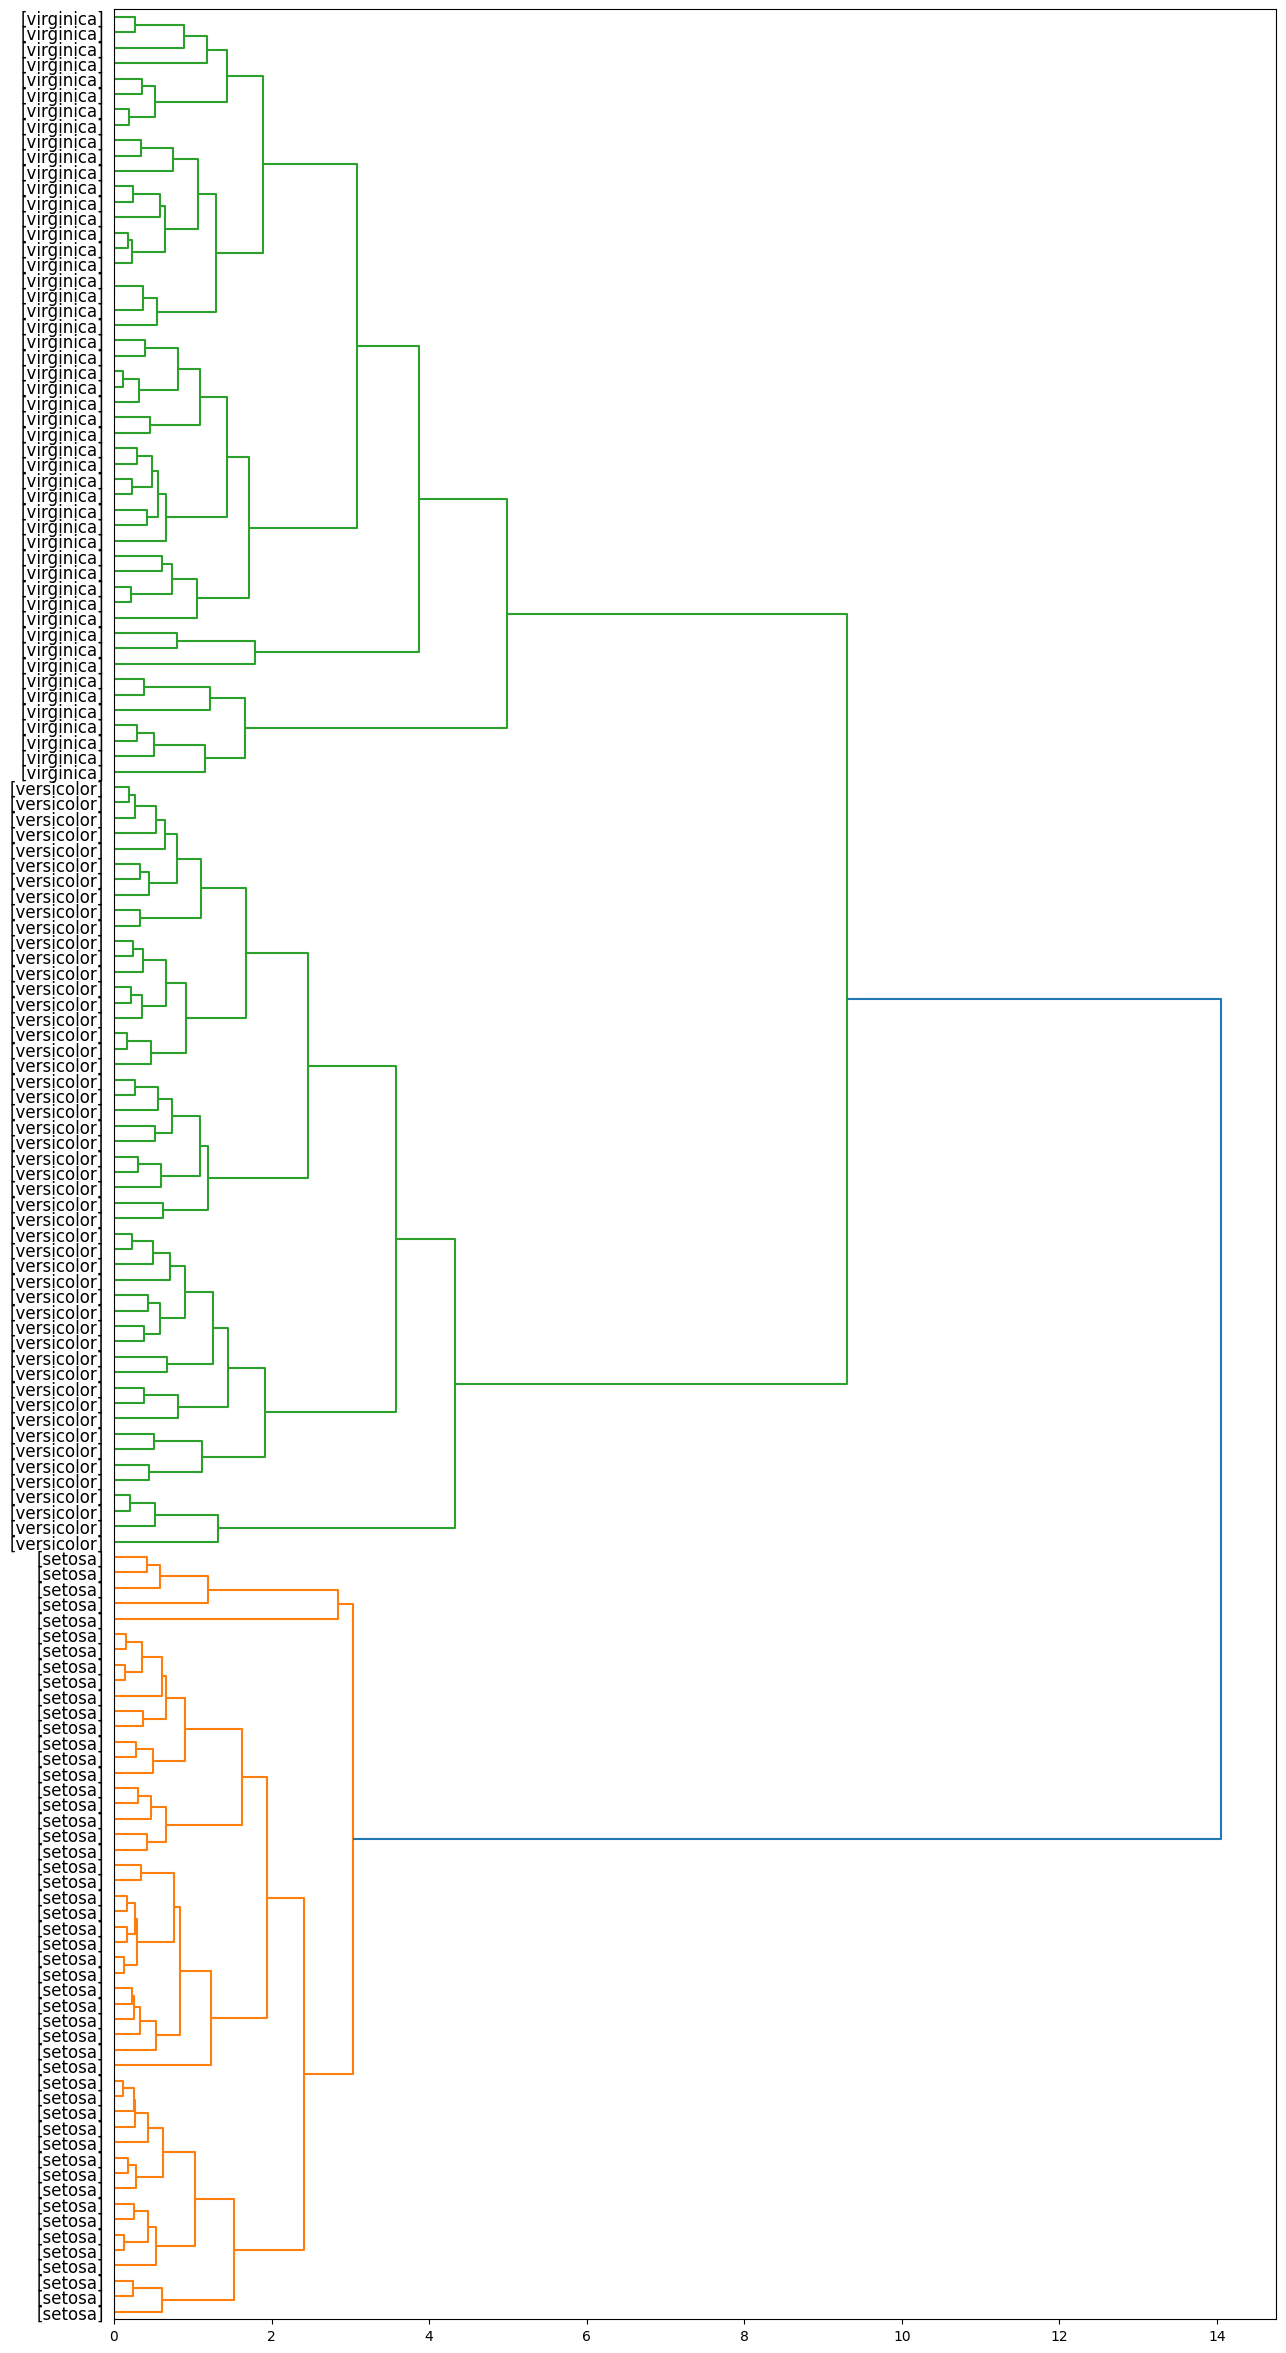

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(15,30))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf_iris['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(iris_complete, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

<div style="text-align: right"> Metode ini menggabungkan dua klaster dengan mempertimbangkan jarak terbesar antara dua objek dari klaster yang berbeda. Hasil dendrogram menunjukkan keunggulan metode ini dalam menciptakan klaster yang seimbang dan akurat, sesuai dengan label kelas yang sebenarnya. Formasi klaster mencerminkan ketepatan klasifikasi dengan tiga label kelas yang ada, dan kesalahan pengelompokan objek sangat minim. Selain itu, metode ini berhasil memisahkan objek-objek yang memiliki jarak sangat dekat, seperti objek dengan label kelas versicolor dan virginica yang terletak di sebelah kanan dendrogram. </div>

#### **e. Agglomerative Clustering with Scikit-Learn**

##### **1. Single Linkage**

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
iris_single = AgglomerativeClustering(n_clusters = 3, linkage = 'single').fit(feature_mtx)

# Melakukan clustering
iris_single.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<div style="text-align: right">  Menampilkan label klaster untuk setiap sampel dalam data. </div>

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
single_iris_pdf = pdf_iris.copy(deep=True)

# Menambahkan kolom baru ke DataFrame single_iris_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (iris_single), yang berisi label klaster untuk setiap sampel.
single_iris_pdf['cluster_'] = iris_single.labels_

# Menampilkan lima baris pertama
single_iris_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


<div style="text-align: right"> Menampilkan DataFrame baru yang merupakan salinan dari pdf dengan tambahan kolom cluster_ yang berisi label klaster hasil dari agglomerative clustering. </div>

In [ ]:
# Menghitung tipe di setiap cluster
single_iris_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

<div style="text-align: right"> Hasil tersebut mencerminkan distribusi kelas atau target pada setiap cluster setelah proses pengelompokan pada dataset iris. Cluster 0 secara eksklusif berisi seluruh contoh yang memiliki target 2 (kelas 2), dengan jumlah total 50 contoh. Sebaliknya, Cluster 1 memuat seluruh contoh yang memiliki target 0 (kelas 0), juga dengan jumlah 50 contoh. Sementara itu, Cluster 2 menampung semua contoh yang memiliki target 1 (kelas 1), dan jumlahnya pun mencapai 50 contoh. Dengan demikian, hasil clustering ini menggambarkan pola penyebaran kelas yang jelas pada masing-masing cluster, memberikan wawasan tentang struktur dan relasi antara kelas-kelas pada dataset iris. </div>

In [ ]:
# Karakteristik masing-masing cluster
agg_iris_single_pdf = single_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()
agg_iris_single_pdf

<ipython-input-51-645192f6f445>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris_single_pdf = single_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


<div style="text-align: right"> Hasil analisis menunjukkan nilai rata-rata dari setiap fitur (sepal length, sepal width, petal length, dan petal width) dalam setiap cluster dan target pada dataset iris setelah proses clustering. Pada Cluster 0 dengan Target 2 (kelas 2), terdapat rata-rata sepal length sebesar 6.588 cm, sepal width sebesar 2.974 cm, petal length sebesar 5.552 cm, dan petal width sebesar 2.026 cm. Cluster 1, yang berhubungan dengan Target 0 (kelas 0), menunjukkan rata-rata sepal length 5.006 cm, sepal width 3.428 cm, petal length 1.462 cm, dan petal width 0.246 cm. Sementara itu, Cluster 2 terkait dengan Target 1 (kelas 1), memiliki rata-rata sepal length 5.936 cm, sepal width 2.770 cm, petal length 4.260 cm, dan petal width 1.326 cm. Informasi ini memberikan gambaran tentang karakteristik rata-rata setiap cluster dan target dalam dataset iris setelah dilakukan analisis clustering. </div>

##### **2. Average Linkage**

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
iris_avg = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(feature_mtx)

# Melakukan clustering
iris_avg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Menampilkan label klaster untuk setiap sampel dalam data.

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
avg_iris_pdf = pdf_iris.copy(deep=True)

# Menambahkan kolom baru ke DataFrame avg_iris_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (iris_avg), yang berisi label klaster untuk setiap sampel.
avg_iris_pdf['cluster_'] = iris_avg.labels_

# Menampilkan lima baris pertama
avg_iris_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Menampilkan DataFrame baru yang merupakan salinan dari pdf dengan tambahan kolom cluster_ yang berisi label klaster hasil dari agglomerative clustering.

In [ ]:
# Menghitung tipe di setiap cluster
avg_iris_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

<div style="text-align: right"> Hasil tersebut menggambarkan distribusi kelas atau target pada setiap cluster setelah melakukan proses pengelompokan pada dataset iris. Cluster 0 menampung seluruh contoh dengan target 2 (kelas 2), terdiri dari 50 contoh. Cluster 1 memuat seluruh contoh dengan target 0 (kelas 0), juga terdiri dari 50 contoh. Sementara itu, Cluster 2 berisi seluruh contoh dengan target 1 (kelas 1) sebanyak 50 contoh. Dengan demikian, analisis clustering menunjukkan pemisahan yang jelas antara kelas-kelas pada dataset iris, di mana setiap cluster secara eksklusif menggambarkan satu kelas tertentu. </div>

In [ ]:
# Karakteristik masing-masing cluster
agg_iris_avg_pdf = avg_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()
agg_iris_avg_pdf

<ipython-input-55-9e3959575b05>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris_avg_pdf = avg_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


Hasil tersebut menggambarkan rata-rata nilai dari masing-masing fitur, yaitu panjang sepal, lebar sepal, panjang petal, dan lebar petal, pada setiap cluster dan target dalam dataset iris setelah proses clustering. Cluster 0, yang berkaitan dengan Target 2 (kelas 2), menunjukkan rata-rata panjang sepal sebesar 6.588 cm, lebar sepal sebesar 2.974 cm, panjang petal sebesar 5.552 cm, dan lebar petal sebesar 2.026 cm. Cluster 1, yang berkaitan dengan Target 0 (kelas 0), memiliki rata-rata panjang sepal sebesar 5.006 cm, lebar sepal sebesar 3.428 cm, panjang petal sebesar 1.462 cm, dan lebar petal sebesar 0.246 cm. Sementara itu, Cluster 2, yang berhubungan dengan Target 1 (kelas 1), menunjukkan rata-rata panjang sepal sebesar 5.936 cm, lebar sepal sebesar 2.770 cm, panjang petal sebesar 4.260 cm, dan lebar petal sebesar 1.326 cm. Data ini memberikan gambaran komprehensif mengenai karakteristik rata-rata setiap fitur dalam setiap cluster dan target pada dataset iris setelah dilakukan proses clustering.

##### **3. Complete Linkage**

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
iris_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete').fit(feature_mtx)

# Melakukan clustering
iris_complete.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Menampilkan label klaster untuk setiap sampel dalam data.

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
complete_iris_pdf = pdf_iris.copy(deep=True)

# Menambahkan kolom baru ke DataFrame complete_iris_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (iris_complete), yang berisi label klaster untuk setiap sampel.
complete_iris_pdf['cluster_'] = iris_complete.labels_

# Menampilkan lima baris pertama
complete_iris_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


Menampilkan DataFrame baru yang merupakan salinan dari pdf dengan tambahan kolom cluster_ yang berisi label klaster hasil dari agglomerative clustering.

In [ ]:
# Menghitung tipe di setiap cluster
complete_iris_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         0         50
1         1         50
          2         20
2         2         30
Name: cluster_, dtype: int64

Hasil analisis menunjukkan distribusi jumlah sampel pada setiap cluster setelah menerapkan metode complete linkage pada dataset iris. Terdapat empat cluster yang terbentuk, dengan rincian sebagai berikut: Cluster 0 memiliki 50 sampel yang secara khusus terkait dengan Target 0 atau kelas 0. Cluster 1 terdiri dari dua kelompok, yang pertama terkait dengan Target 1 (kelas 1) dengan jumlah sampel sebanyak 50, dan yang kedua terkait dengan Target 2 (kelas 2) dengan jumlah sampel sebanyak 20. Sementara itu, Cluster 2 terkait dengan Target 2 (kelas 2) dan memiliki 30 sampel. Hasil ini memberikan gambaran jelas tentang sebaran data pada setiap cluster dan kaitannya dengan target kelas pada dataset iris melalui pendekatan complete linkage.

In [ ]:
# Karakteristik masing-masing cluster
agg_iris_complete_pdf = complete_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()
agg_iris_complete_pdf

<ipython-input-59-be4d4301e01e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris_complete_pdf = complete_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target                                                           
0        0                5.006000             3.428           1.462000   
1        1                5.936000             2.770           4.260000   
         2                6.055000             2.740           5.130000   
2        2                6.943333             3.130           5.833333   

                 petal width (cm)  
cluster_ target                    
0        0               0.246000  
1        1               1.326000  
         2               1.815000  
2        2               2.166667

Hasil analisis menunjukkan rata-rata dari empat fitur utama, yaitu panjang kelopak bunga (sepal length), lebar kelopak bunga (sepal width), panjang mahkota bunga (petal length), dan lebar mahkota bunga (petal width), setiap kombinasi cluster dan target pada dataset iris setelah dilakukan proses clustering dengan menggunakan metode complete linkage. Pada Cluster 0 dengan target kelas 0, rata-rata ukuran sepal length adalah 5.006 cm, sepal width sebesar 3.428 cm, petal length mencapai 1.462 cm, dan petal width sekitar 0.246 cm. Sementara itu, Cluster 1 dengan target kelas 1 memiliki rata-rata sepal length sebesar 5.936 cm, sepal width 2.770 cm, petal length 4.260 cm, dan petal width 1.326 cm. Cluster 2, yang juga memiliki target kelas 1, menunjukkan rata-rata sepal length 6.055 cm, sepal width 2.740 cm, petal length 5.130 cm, dan petal width 1.815 cm. Terakhir, Cluster 2 dengan target kelas 2 memiliki rata-rata sepal length 6.943 cm, sepal width 3.130 cm, petal length 5.833 cm, dan petal width 2.167 cm. Analisis ini memberikan gambaran rinci tentang karakteristik rata-rata setiap cluster dengan memperhatikan kelas target pada dataset iris setelah dilakukan teknik clustering complete linkage.

##### **4. Plotting Scatter Plot**

Text(0.5, 1.0, 'Complete Linkage')

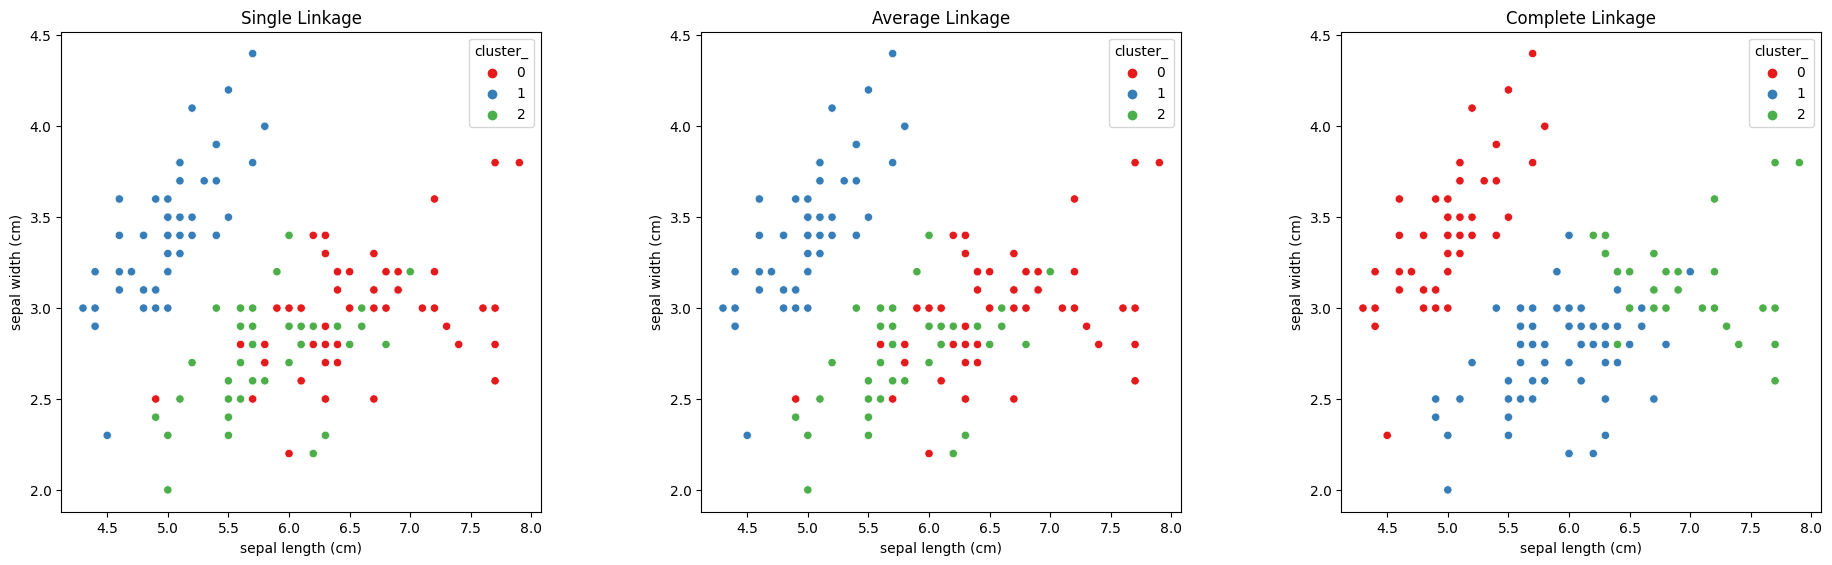

In [62]:
import seaborn as sns

# Membuat figur
fig = plt.figure(figsize=(16, 8))

# Subplot untuk Single Linkage
ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=single_iris_pdf, palette='Set1')
ax1.set_title('Single Linkage')

# Subplot untuk Average Linkage
ax2 = fig.add_axes([0.5, 0.1, 0.3, 0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=avg_iris_pdf, palette='Set1')
ax2.set_title('Average Linkage')

# Subplot untuk Complete Linkage
ax3 = fig.add_axes([0.9, 0.1, 0.3, 0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=complete_iris_pdf, palette='Set1')
ax3.set_title('Complete Linkage')


* Hasil analisis klaster menggunakan metode Single Linkage menunjukkan bahwa klaster yang dihasilkan tidak sesuai dengan karakteristik data, terutama pada variabel 'sepal length (cm)' dan 'sepal width (cm)'. Terlihat bahwa pembentukan klaster tidak mempertimbangkan dengan baik perbedaan ukuran kelopak bunga, dan klaster yang terbentuk tidak konsisten dengan label kelas sebenarnya. Sebaliknya, metode Average Linkage menghasilkan klaster yang lebih sesuai dengan data, memperhatikan perbedaan ukuran kelopak bunga dan lebih konsisten dengan label kelas. Meskipun demikian, masih terdapat beberapa kesalahan pengelompokan. Sementara itu, metode Complete Linkage menghasilkan klaster yang paling sesuai dengan karakteristik data, memperhatikan dengan baik variabel 'sepal length (cm)' dan 'sepal width (cm)'. Klaster yang terbentuk paling akurat sesuai dengan label kelas, bahkan mampu memisahkan objek-objek yang memiliki jarak sangat dekat. Metode ini menunjukkan performa terbaik dalam pengelompokan data pada scatterplot tersebut.

##### **5. Plotting Dendogram**

Text(0.5, 1.0, 'Complete Linkage')

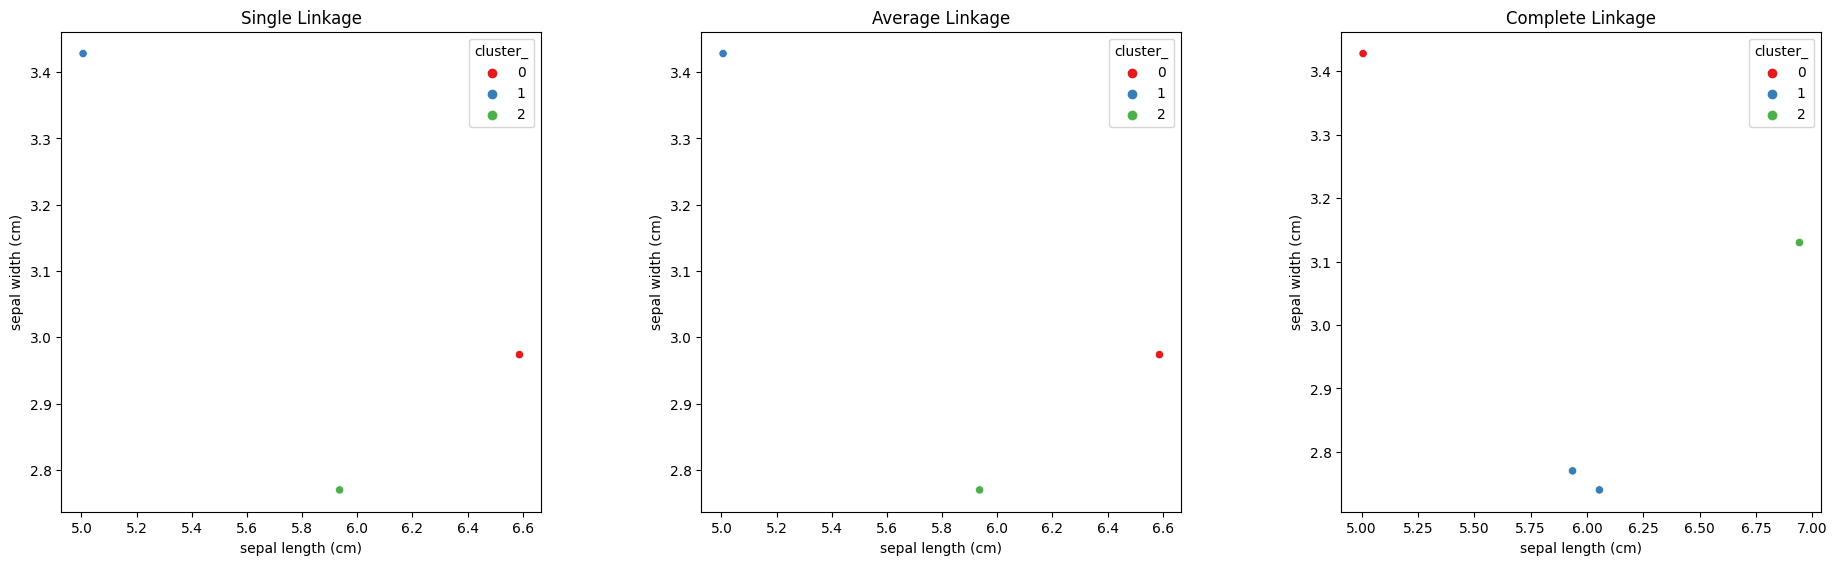

In [ ]:
# Import Library seaborn
import seaborn as sns

# Membuat figur
fig = plt.figure(figsize=(16, 8))

# Subplot untuk Single Linkage
ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=agg_iris_single_pdf, palette='Set1')
ax1.set_title('Single Linkage')

# Subplot untuk Average Linkage
ax2 = fig.add_axes([0.5, 0.1, 0.3, 0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=agg_iris_avg_pdf, palette='Set1')
ax2.set_title('Average Linkage')

# Subplot untuk Complete Linkage
ax3 = fig.add_axes([0.9, 0.1, 0.3, 0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=agg_iris_complete_pdf, palette='Set1')
ax3.set_title('Complete Linkage')

 Hasil analisis klaster menggunakan tiga metode yang berbeda, yaitu Single Linkage, Average Linkage, dan Complete Linkage, dapat dilihat dalam visualisasi klaster. Pada metode Single Linkage, setiap klaster direpresentasikan dengan warna yang menandai keanggotaan setiap titik dalam klaster tersebut, dengan karakteristik masing-masing klaster disimpan dalam variabel agg_iris_single_pdf. Sementara itu, metode Average Linkage juga menunjukkan visualisasi klaster dengan warna yang membedakan keanggotaan tiap titik berdasarkan karakteristik klaster yang tersimpan dalam variabel agg_iris_avg_pdf. Terakhir, metode Complete Linkage memberikan visualisasi klaster di mana tiap titik diberi warna berdasarkan keanggotaannya, dan tipe yang berbeda dalam satu klaster ditunjukkan dengan warna yang sama, dengan hasil yang diambil dari karakteristik klaster yang tersimpan dalam variabel agg_iris_complete_pdf.

##### **6. Perbedaan Agglomerative Clustering Single Linkage, Average Linkage, dan Complete Linkage Menggunakan Scipy dan Scikit-Learn:**

Metode agglomerative clustering, seperti single linkage, average linkage, dan complete linkage, berbeda dalam pendekatan perhitungan jarak antar-klaster. Single linkage cenderung menghasilkan klaster yang panjang dan tidak seimbang, serta sensitif terhadap outlier. Average linkage menghasilkan klaster yang lebih seimbang dan konsisten dengan label kelas yang sebenarnya. Sementara itu, complete linkage menghasilkan klaster paling seimbang dan akurat, serta lebih robust terhadap outlier. Analisis dendrogram menunjukkan bahwa single linkage dan average linkage tidak sesuai dengan label kelas sebenarnya, sementara complete linkage lebih sesuai dan robust terhadap outlier. Scatter plot menunjukkan bahwa single linkage tidak memperhatikan variabel dengan baik, sedangkan average linkage dan complete linkage menghasilkan klaster yang lebih konsisten dengan label kelas. Complete linkage terlihat lebih mampu memisahkan objek dengan jarak yang sangat dekat.